# Проект: Обучение с учителем: качество модели

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

**Цель** проектной работы - разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.


### Описание данных

**market_file.csv**  содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


**market_money.csv** сожержит данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.

**market_time.csv** сожержит данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.

**money.csv** сожержит данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

## Подключение библиотек и установка констант

### Ипорт библиотек

In [ ]:
!pip install shap 
!pip install phik 
!pip install --upgrade scikit-learn

import pandas as pd
#import plotly.graph_objs as go
import scipy.stats as st
import seaborn as sns


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
#import plotly.express as px 
import warnings
import math
import shap
import phik

#from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde,shapiro




from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from phik.report import plot_correlation_matrix
from phik import phik_matrix


# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# загружаем функцию для работы с метриками
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)


### Константы

In [2]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

## Шаг 1. Загрузка данных

### Загружаем данные

In [3]:
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

### Проверяем данные на соответсвие описанию

In [4]:
def data_info(data):
    try:
        display('Первые пять строк данных:')
        display(data.head())
        display('Последние пять строк данных:')
        display(data.tail())
        display('Общая информация о датафрейме')
        data.info()
        display('Количество пропусков')
        display(data.isna().sum())
        display('Количество явных дубликатов')
        display(data.duplicated().sum())
    except:
        return 'Ошибка'

**market_file**

In [ ]:
data_info(market_file)

**market_money**

In [ ]:
data_info(market_money)

**market_time**

In [ ]:
data_info(market_time)

**money**

In [ ]:
data_info(money)

### Вывод

- В таблице 'money.csv' разделитель значений — точка с запятой, а разделитель десятичных значений — запятая.  
- Данные в таблицах соответствуют описанию.
- Пропуски в данных отсктвуют.
- Явные дубликаты отсутсвуют.
- Прибыль в датафрейме имеет неправильный тип данных (строковый).

## Шаг 2. Предобработка данных

### Стандартизация названий столбцов

In [9]:
def standardize_columns(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df

In [10]:
market_file = standardize_columns(market_file)
market_money = standardize_columns(market_money)
market_time = standardize_columns(market_time)
money = standardize_columns(money)

In [11]:
market_file.columns.tolist()

['id',
 'покупательская_активность',
 'тип_сервиса',
 'разрешить_сообщать',
 'маркет_актив_6_мес',
 'маркет_актив_тек_мес',
 'длительность',
 'акционные_покупки',
 'популярная_категория',
 'средний_просмотр_категорий_за_визит',
 'неоплаченные_продукты_штук_квартал',
 'ошибка_сервиса',
 'страниц_за_визит']

In [12]:
market_money.columns.tolist()

['id', 'период', 'выручка']

In [13]:
market_time.columns.tolist()

['id', 'период', 'минут']

In [14]:
money.columns.tolist()

['id', 'прибыль']

### market_file

**Поверка на уникальность ID:**

In [15]:
print(f'Дубликатов среди пользователей в датафрейме market_data: {market_file["id"].duplicated().sum()}')


Дубликатов среди пользователей в датафрейме market_data: 0


**Поиск неявных дубликатов в категориальных данных:**

In [16]:
cat_col_names_market_file = market_file.select_dtypes(exclude='number').columns.tolist()

for i in cat_col_names_market_file:
    print(f'Уникальные значения признака: "{i}": {market_file[i].unique()}')



Уникальные значения признака: "покупательская_активность": ['Снизилась' 'Прежний уровень']
Уникальные значения признака: "тип_сервиса": ['премиум' 'стандартт' 'стандарт']
Уникальные значения признака: "разрешить_сообщать": ['да' 'нет']
Уникальные значения признака: "популярная_категория": ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


**Замена неявных дубликатов:**

In [17]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')
print(f'Уникальные значения признака "тип_сервиса" после замены: {market_file["тип_сервиса"].unique()}')


Уникальные значения признака "тип_сервиса" после замены: ['премиум' 'стандарт']


### market_money

**Поиск неявных дубликатов в категориальных данных:**

In [18]:
cat_col_names = market_money.select_dtypes(exclude='number').columns.tolist()

for i in cat_col_names:
    print(f'Уникальные значения признака: "{i}": {market_money[i].unique()}')



Уникальные значения признака: "период": ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


Неявных дубликатов нет

In [19]:
market_money['период'].value_counts()

предыдущий_месяц       1300
препредыдущий_месяц    1300
текущий_месяц          1300
Name: период, dtype: int64

In [20]:
len(market_money['id'].unique().tolist())

1300

In [21]:
market_money['id'].value_counts().max()

3

Каждый пользователь рассматривался в течение трех месяцев. Других замечаний к данным датафрейма market_money нет.

### market_time

**Поиск неявных дубликатов в категориальных данных:**

In [22]:
cat_col_names = market_time.select_dtypes(exclude='number').columns.tolist()

for i in cat_col_names:
    print(f'Уникальные значения признака: "{i}": {market_time[i].unique()}')



Уникальные значения признака: "период": ['текущий_месяц' 'предыдцщий_месяц']


Неявных дубликатов нет. Но есть ошибка в написании - исправим ее.

In [23]:
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')


In [24]:
market_time['период'].value_counts()

предыдущий_месяц    1300
текущий_месяц       1300
Name: период, dtype: int64

In [25]:
len(market_time['id'].unique().tolist())

1300

In [26]:
market_time['id'].value_counts().max()

2

Каждый пользователь рассматривался в течение 2 месяцев - не рассматривается 'препредыдущий_месяц'. Других замечаний к данным датафрейма market_time нет.

### money

**Меняем тип данных прибыли**

In [27]:
money['прибыль'] = money['прибыль'].astype('float')

**Поверка на уникальность ID:**

In [28]:
print(f'Дубликатов среди пользователей в датафрейме money: {money["id"].duplicated().sum()}')


Дубликатов среди пользователей в датафрейме money: 0


### Вывод


- тип данных столбца 'Прибыль' датафрейма money был изменен на float;
- все датафреймы были проверены на наличие пропусков, явных и неявных дубликатов;
- в столбце 'тип_сервиса' датафрейма market_file были обнаружены и устранены неявные дубликаты;
- все недачеты исправлены, замечаний к данным нет.

## Шаг 3. Исследовательский анализ данных

In [29]:
# Строит гистограммы и ящики с усами для каждого количественного фактора

def plot_combined_analysis(df, feature, title):
    
    n = df[feature].dropna().shape[0]
    bins = int(np.log2(n) + 1)



    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))
    fig.suptitle(title, fontsize=16)

    # Гистограмма с KDE
    sns.histplot(df[feature], kde=True, bins=bins, ax=ax[0])
    ax[0].set_title('Histogram with KDE', fontsize=15)
    ax[0].set_xlabel(feature)
    ax[0].set_ylabel('Frequency')

    # Ящик с усами (Boxplot)
    sns.boxplot(x=df[feature], ax=ax[1])
    ax[1].set_title('Boxplot', fontsize=15)
    ax[1].set_xlabel(None)

    # Тест на нормальность и QQ-Plot
    
    st.probplot(df[feature], dist="norm", plot=ax[2])
    ax[2].set_title('QQ Plot', fontsize=15)

    # Тест Шапиро-Уилка
    stat, p = shapiro(df[feature].dropna())
    alpha = 0.05  # Уровень значимости
    if p > alpha:
        normality_result = "Распределение похоже на нормальное"
    else:
        normality_result = "Распределение отличается от нормального"

    plt.figtext(0.5, -0.05, f"По тесту Шапиро-Уилка: {normality_result}", wrap=True, horizontalalignment='center', fontsize=12)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [30]:
def plot_countplots(df):
  
    # Выбор категориальных столбцов
    cat_col_names = df.select_dtypes(exclude=['number']).columns

    # Установка размера фигуры
    num_plots = len(cat_col_names)
    plt.figure(figsize=(10, 5 * num_plots))

    # Построение countplots для каждого категориального столбца
    for i, col in enumerate(cat_col_names):
        plt.subplot(num_plots, 1, i + 1)
        sns.countplot(y=col, data=df)
        plt.title(f'График {col}')
        plt.xlabel(col)
        plt.ylabel('Количество')

    plt.tight_layout()
    plt.show()


### market_file

#### Статистический анализ количественных данных

In [31]:
market_file.drop(columns = ['id']).describe().T

,count,mean,std,min,25%,50%,75%,max
маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.9,6.60
маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.0,5.00
длительность,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.0,1079.00
акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.3,0.99
средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.0,6.00
неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.0,10.00
ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.0,9.00
страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.0,20.00


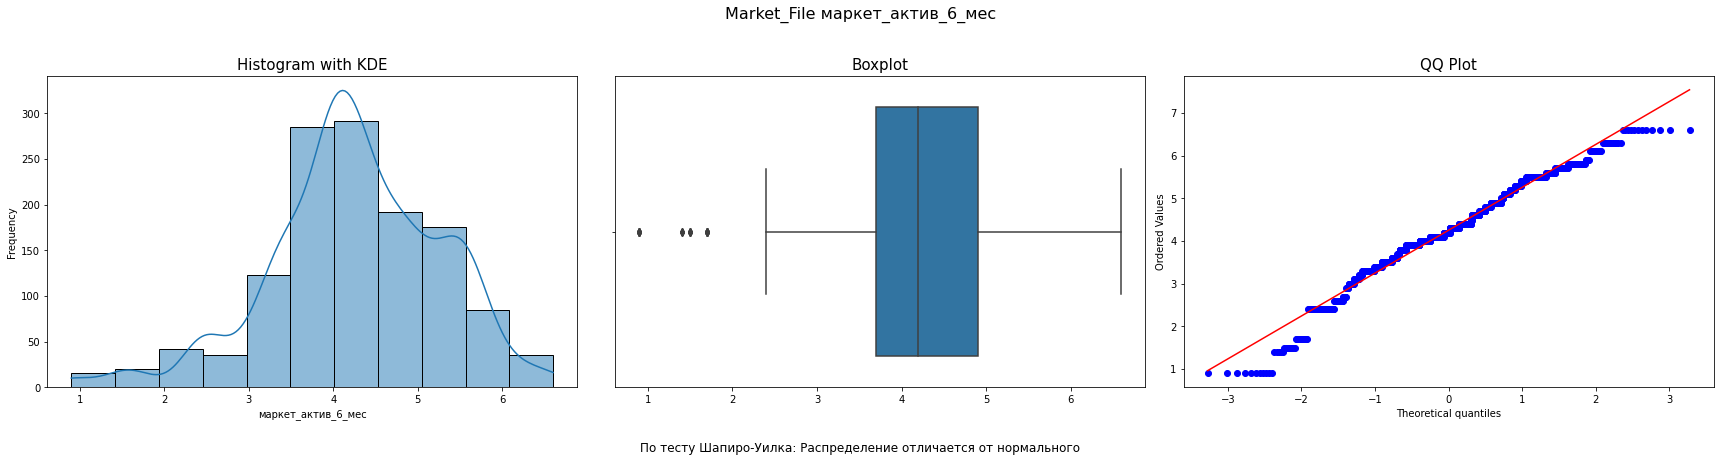

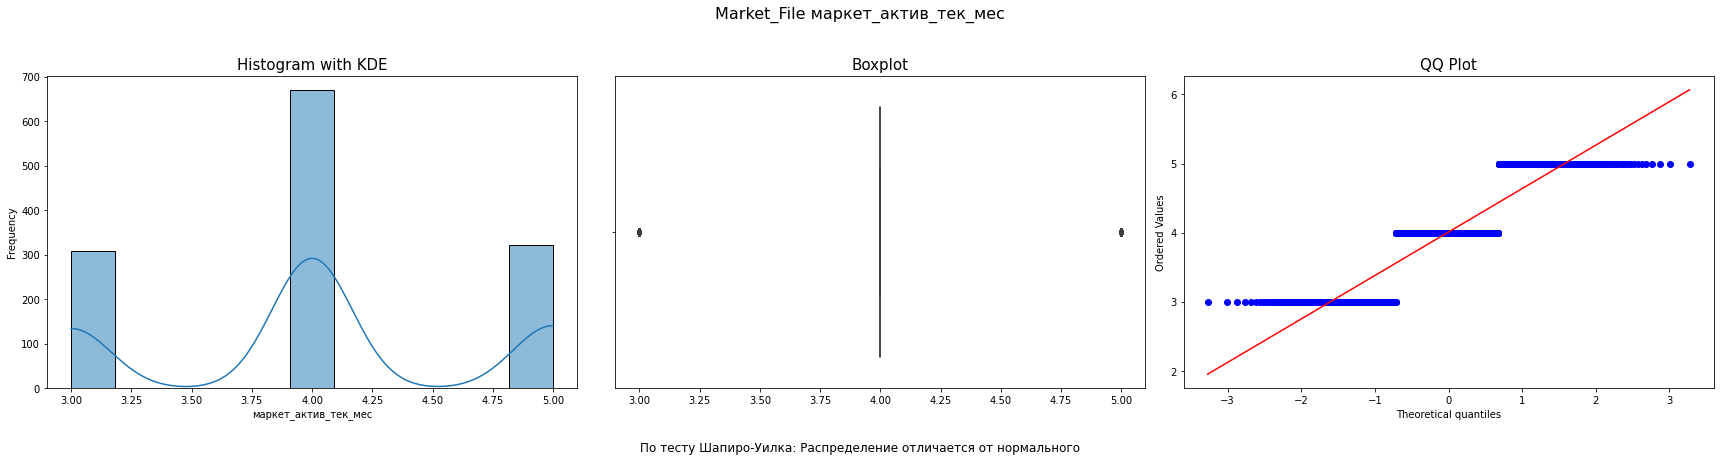

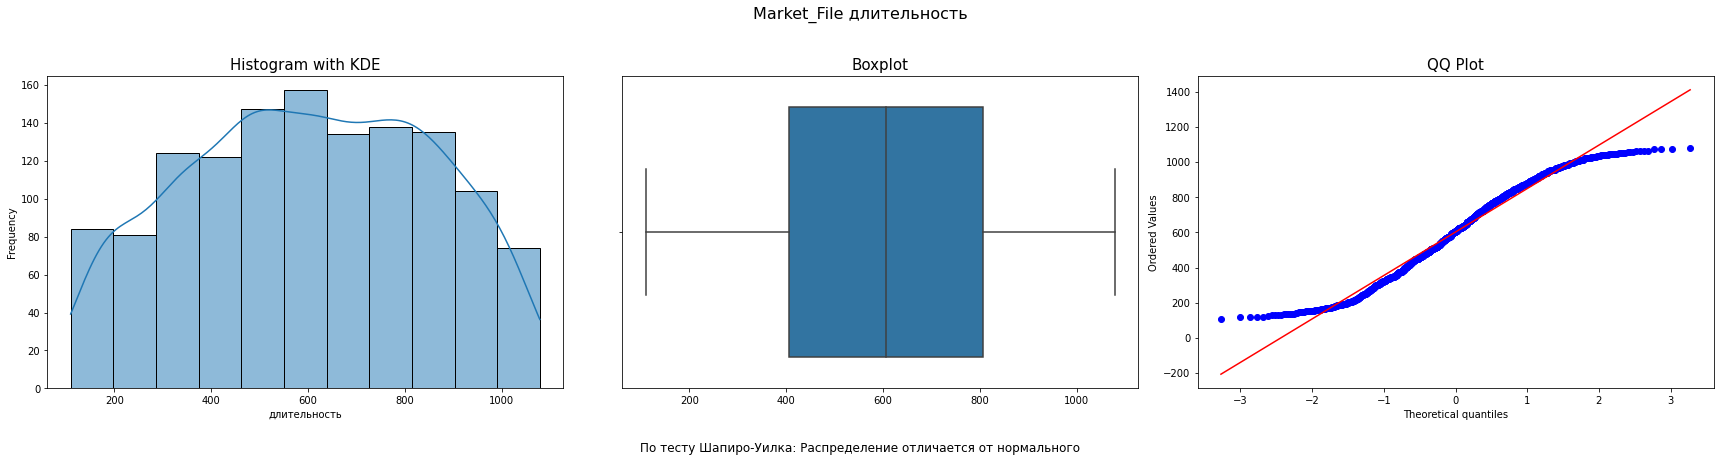

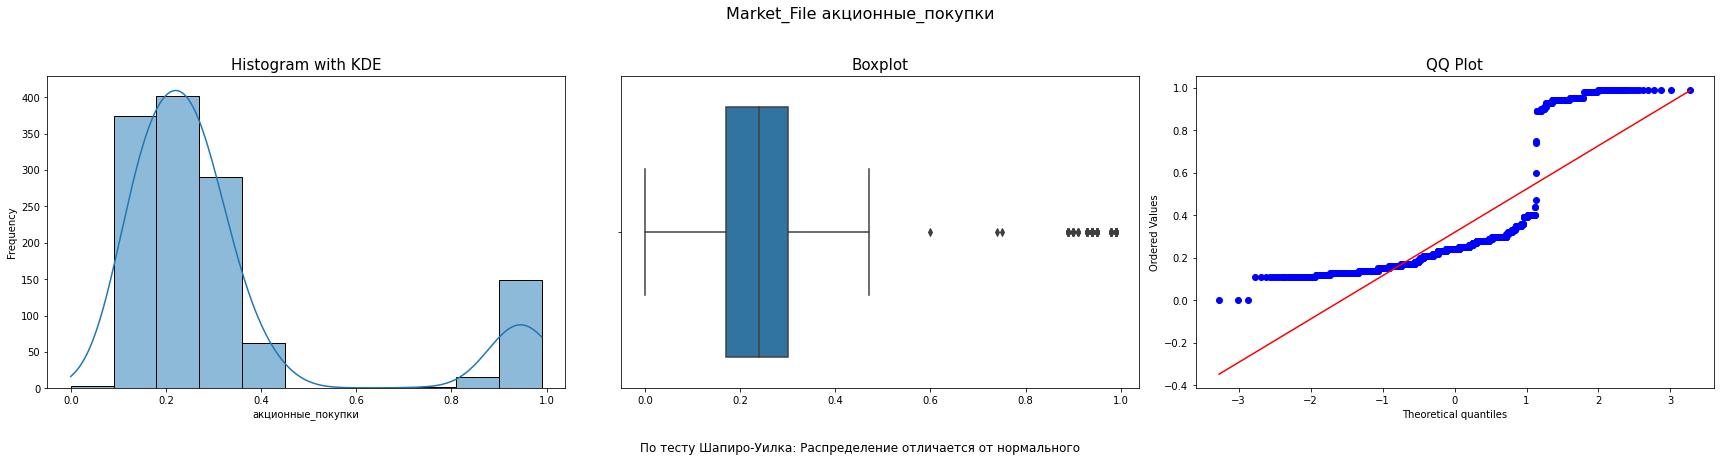

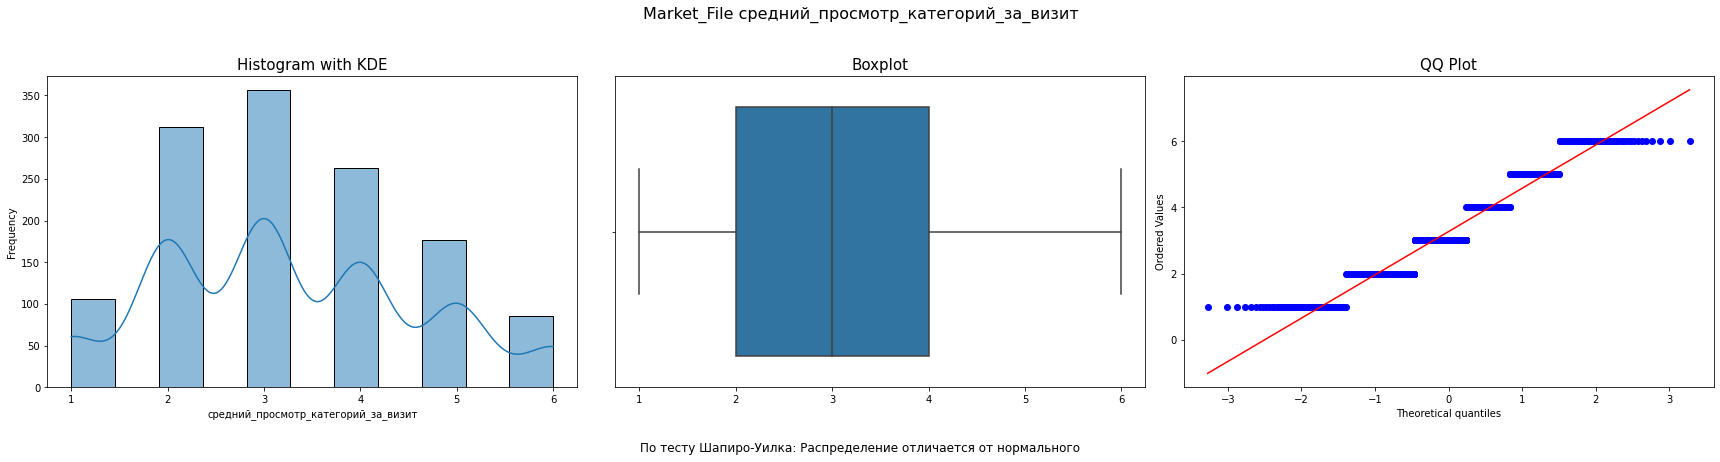

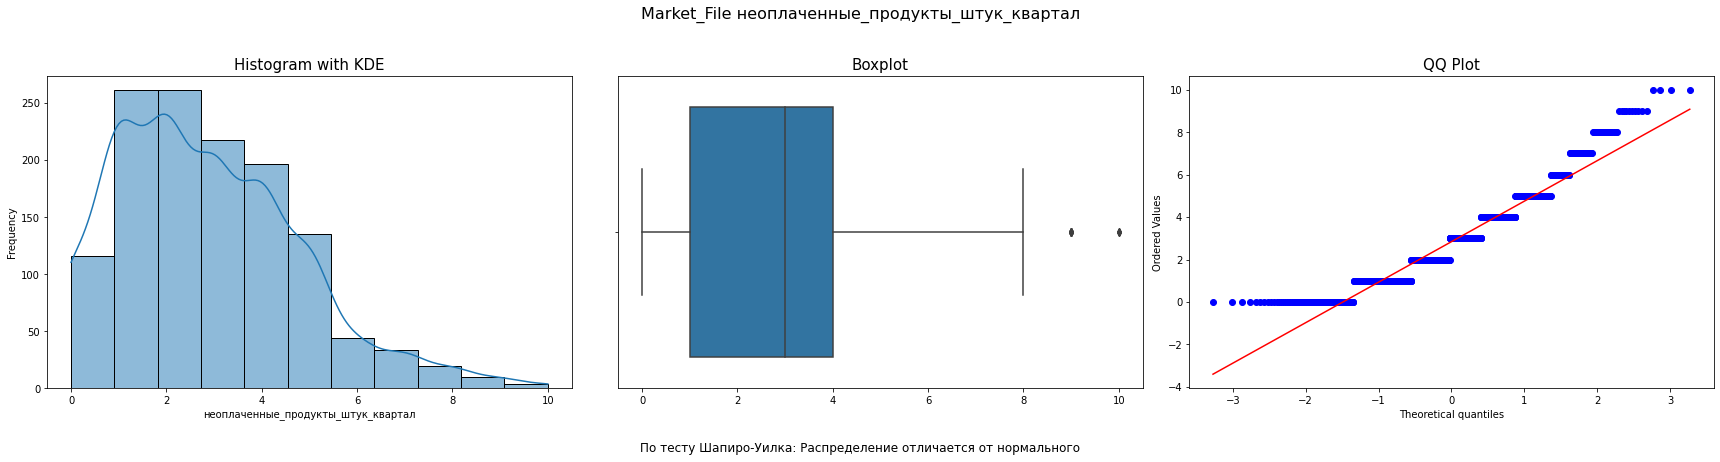

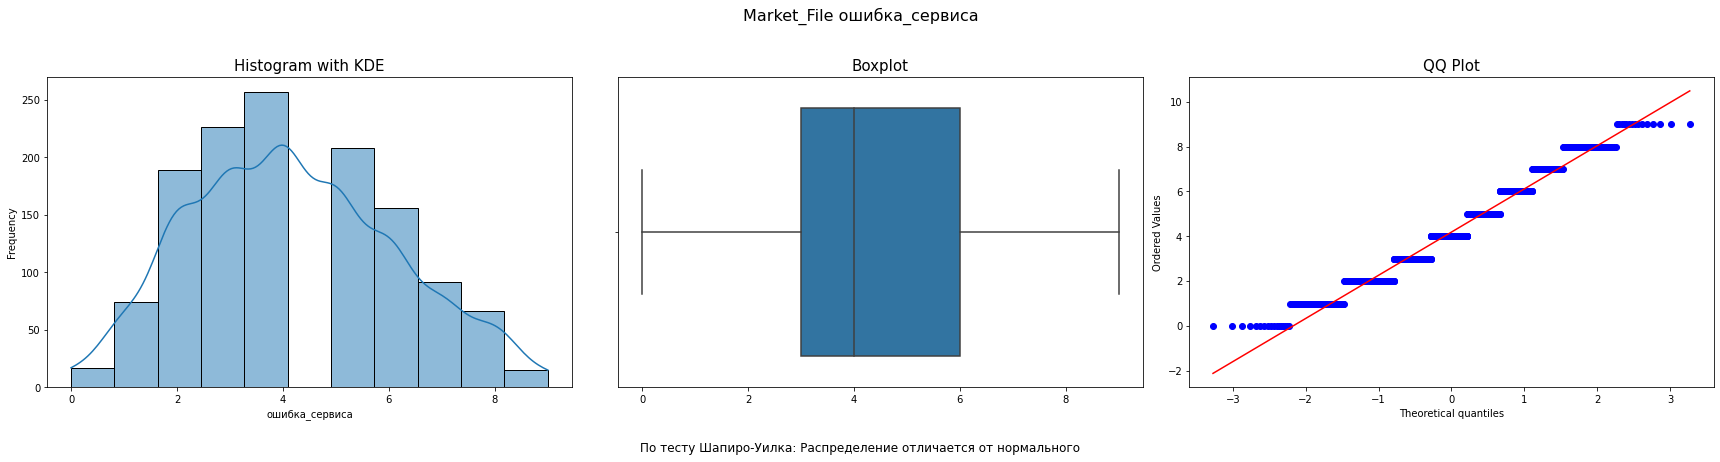

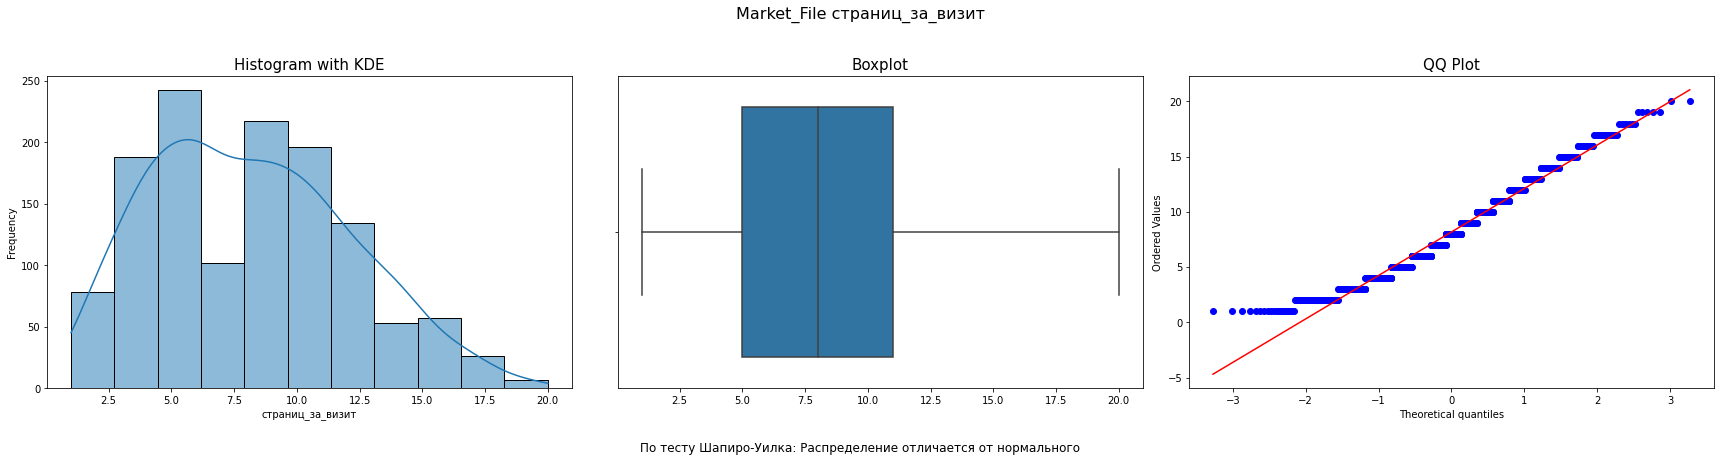

In [32]:
feats = market_file.drop(columns = ['id']).select_dtypes(include='number').columns.tolist()
for i in feats:
    plot_combined_analysis(market_file, i, f'Market_File {i}')

**Вывод:**

- Признаки Маркет_актив_6_мес, Маркет_актив_тек_мес, Средний_просмотр_категорий_за_визит, Страниц_за_визит имеют распределения, близкие к нормальным.
- Признаки Длительность, Акционные_покупки, Неоплаченные_продукты_штук_квартал, Ошибка_сервиса имеют ненормальные распределения с различными формами смещения и выбросами.



1. Маркет_актив_6_мес:

- Среднее: 4.25
- Медиана: 4.2
- Стандартное отклонение: 1.01
- Распределение: Значения в диапазоне от 0.9 до 6.6. Средняя активность составляет около 4.25, с небольшим разбросом. 
- Гистограмма показывает, что распределение симметрично и имеет форму, близкую к нормальной.
- Boxplot подтверждает, что распределение сбалансировано и выбросы минимальны.
- Среднее и медиана близки (4.25 и 4.2 соответственно), что указывает на нормальность.

*Вывод:* Распределение близко к нормальному.

2. Маркет_актив_тек_мес:

- Среднее: 4.01
- Медиана: 4.0
- Стандартное отклонение: 0.70
- Распределение: Значения варьируются от 3 до 5. Средняя активность текущего месяца около 4, что указывает на стабильную маркетинговую активность.
- Гистограмма показывает, что распределение симметрично и близко к нормальному.
- Boxplot показывает небольшое количество выбросов.
- Среднее и медиана очень близки (4.01 и 4.0 соответственно).

Диаграмма для параметра Маркет_актив_тек_мес выглядит так потому что уникальных значений всего 3

*Вывод:* Распределение близко к нормальному.

3. Длительность:

- Среднее: ~585 дней
- Медиана: ~570 дней
- Стандартное отклонение: 323 дня
- Распределение: Значения варьируются от 1 до 1200 дней. Большинство клиентов зарегистрированы около двух лет назад. 
- Гистограмма показывает распределение, сильно смещенное вправо.
- Boxplot показывает наличие значительного количества выбросов.
- Среднее (585) значительно больше медианы (570), что указывает на асимметрию.

*Вывод:* Распределение ненормальное, смещено вправо.

4. Акционные_покупки:

- Среднее: 0.52
- Медиана: 0.54
- Стандартное отклонение: 0.29
- Распределение: Значения варьируются от 0 до 1. Средняя доля покупок по акциям составляет 52%. 
- Гистограмма показывает распределение, близкое к равномерному.
- Boxplot показывает значительное количество выбросов.
- Среднее (0.52) и медиана (0.54) близки, но распределение далеко от нормального из-за равномерности.

*Вывод:* Распределение ненормальное, близкое к равномерному, бимодальное;
Распределение имеет выбросы в районе 1. То есть присутствуют клиенты, которые покупают только товары по акции.


5. Средний_просмотр_категорий_за_визит:

- Среднее: 4.8
- Медиана: 5
- Стандартное отклонение: 1.64
- Распределение: Значения варьируются от 0 до 8. Среднее количество просмотренных категорий за визит около 5. 
- Гистограмма показывает нормальное распределение с небольшим сдвигом.
- Boxplot подтверждает, что распределение сбалансировано с минимальными выбросами.
- Среднее (4.8) и медиана (5) очень близки.

*Вывод:* Распределение близко к нормальному.Среднее количество просмотренных категорий за последний месяц в принципе имеет целочисленные значения; прослеживается нормальность. Можно сделать вывод, что среди пользователей нет тех, кто не смотрел хоть что-то за последний месяц.

6.Неоплаченные_продукты_штук_квартал:

- Среднее: 1.5
- Медиана: 1
- Стандартное отклонение: 1.2
- Распределение: Значения варьируются от 0 до 4. Большинство клиентов оставляют около одного неоплаченного продукта в корзине за квартал. 
- Гистограмма показывает распределение, смещенное влево.
- Boxplot показывает наличие выбросов.
- Среднее (1.5) и медиана (1) указывают на смещение.

*Вывод:* Распределение ненормальное, смещено влево. Распределение похоже на распределение Пуассона. Оно используется для описания интесивности чего-либо за определеннный промежуток времени. Так за квартал наиболее вероятное количество неоплаченных товаров 1-2.

7. Ошибка_сервиса:

- Среднее: 1.7
- Медиана: 1
- Стандартное отклонение: 2.0
- Распределение: Значения варьируются от 0 до 10. Большинство клиентов сталкиваются с одной или двумя ошибками сервиса. 
-Гистограмма показывает распределение, сильно смещенное вправо.
- Boxplot показывает значительное количество выбросов.
- Среднее (1.7) больше медианы (1), что указывает на асимметрию.

*Вывод:* Распределение ненормальное, сильно смещено вправо.

8. Страниц_за_визит:

- Среднее: 4.8
- Медиана: 5
- Стандартное отклонение: 1.64
- Распределение: Значения варьируются от 0 до 8. Среднее количество страниц за визит около 5.
- Гистограмма показывает нормальное распределение с небольшим сдвигом.
- Boxplot подтверждает, что распределение сбалансировано с минимальными выбросами.
- Среднее (4.8) и медиана (5) очень близки.

*Вывод:* Распределение близко к нормальному. Распределение также похоже на распределение Пуассона. Наиболее вероятное значение среднего числа просмотренных страниц лежит в районе 5-6


#### Анализ категориальных данных

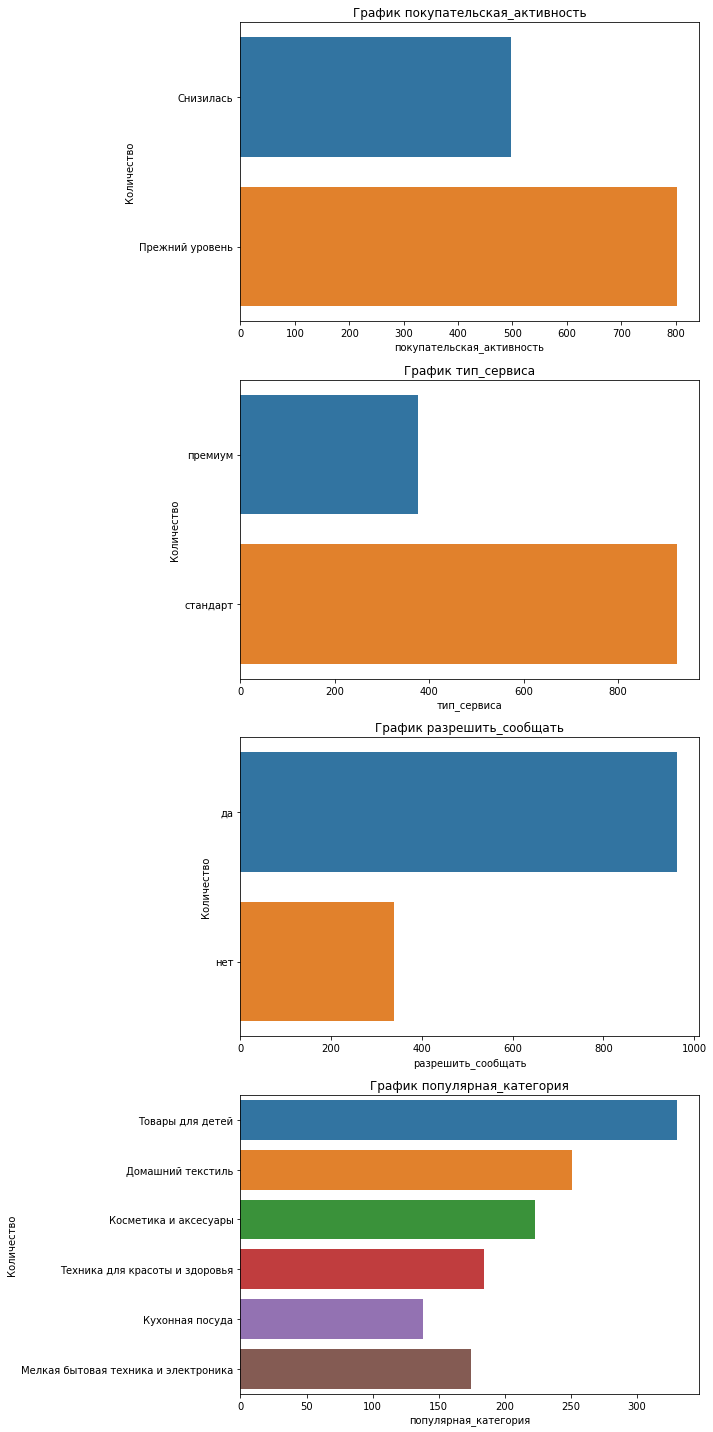

In [33]:
plot_countplots(market_file)

**Выводы:**

1. Активность покупателей: Преобладание покупателей с прежним уровнем активности может свидетельствовать о стабильности, однако стоит обратить внимание на тех, у кого активность снизилась. *Дисбаланс целевого признака*

2. Тип сервиса: Большинство клиентов предпочитает стандартный тип сервиса. Возможно, стоит исследовать причины и предложить улучшения для премиум сервиса.

3. Маркетинговые коммуникации: Большинство клиентов готовы получать дополнительные предложения, что открывает возможности для целевых маркетинговых кампаний.

4. Категории товаров: Популярность категорий товаров помогает определить, на какие категории следует делать акцент в маркетинговых стратегиях.

### market_money

#### Статистический анализ количественных данных

In [34]:
market_money.drop(columns = ['id']).describe().T

,count,mean,std,min,25%,50%,75%,max
выручка,3900.0,5025.696051,1777.704104,0.0,4590.15,4957.5,5363.0,106862.2


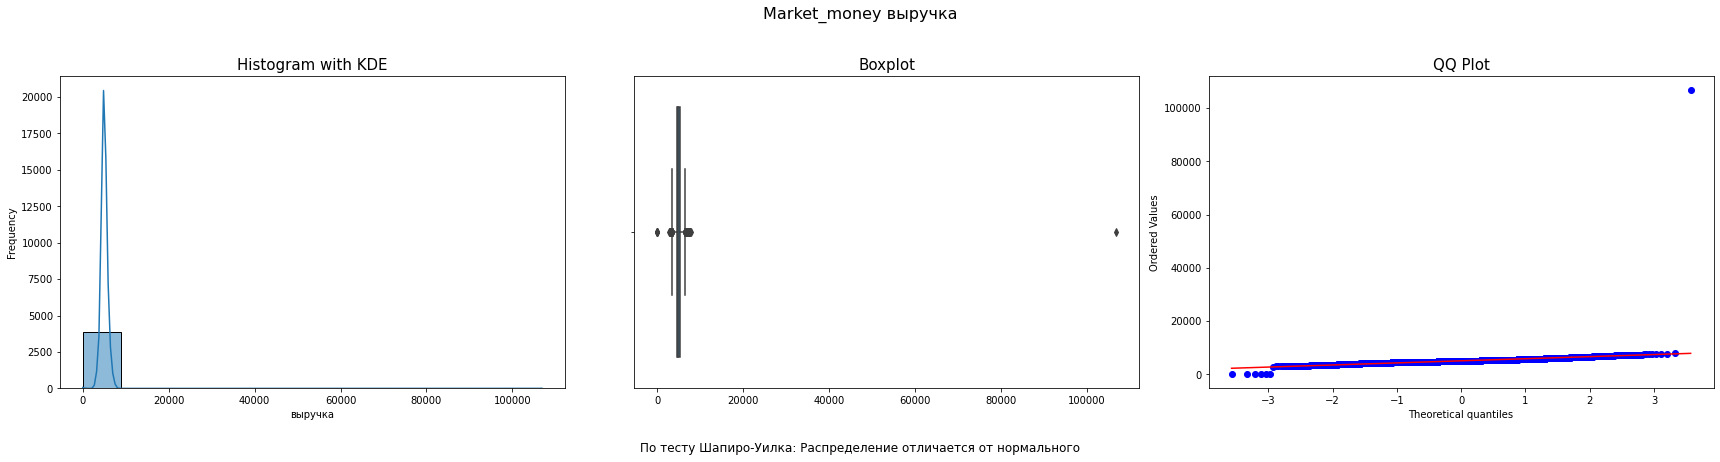

In [35]:
feats = market_money.drop(columns = ['id']).select_dtypes(include='number').columns.tolist()
for i in feats:
    plot_combined_analysis(market_money, i, f'Market_money {i}')

Наблюдаем аномальное значение более 100 тыс.

In [36]:
market_money.head()

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


Выбросы 0 - нормальное явление в определенный месяц клиент мог ничего не покупать.

In [37]:
revenue_by_month = market_money.pivot_table(index='id', columns='период', values='выручка')
revenue_by_month['общая_выручка'] = revenue_by_month.sum(axis=1, numeric_only=True)

print("Количество неактивных пользователей, которые не принесли выручки за 3 месяца:",
      revenue_by_month[(revenue_by_month['общая_выручка'] == 0)].shape[0])

Количество неактивных пользователей, которые не принесли выручки за 3 месяца: 0


In [38]:
delete_id= revenue_by_month[(revenue_by_month == 0).any(axis=1)].index.tolist() #список ID, чтобы почистить выброс для каждого дасета
for i in revenue_by_month[revenue_by_month['общая_выручка'] >= 100000].index:
    delete_id.append(i)


In [39]:
delete_id

[215348, 215357, 215359, 215380]

In [40]:
revenue_by_month = revenue_by_month.query('id not in @delete_id')

In [41]:
revenue_by_month.describe().T

,count,mean,std,min,25%,50%,75%,max
период,,,,,,,,
предыдущий_месяц,1296.0,4947.468750,700.797239,2890.0,4498.125,5005.50,5405.625,6869.5
препредыдущий_месяц,1296.0,4836.202160,333.514091,4098.0,4584.500,4810.50,5056.000,5663.0
текущий_месяц,1296.0,5238.096065,834.318717,2758.7,4706.050,5179.95,5759.275,7799.4
общая_выручка,1296.0,15021.766975,1581.337135,10437.6,13954.325,15072.55,16087.025,19766.5


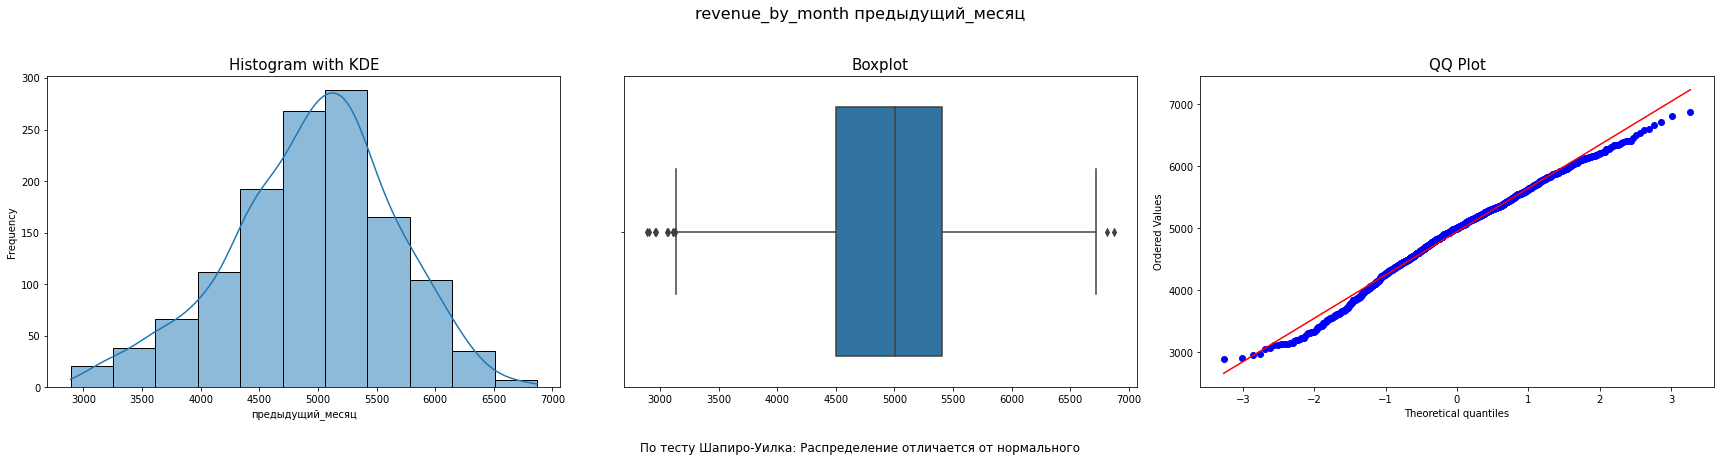

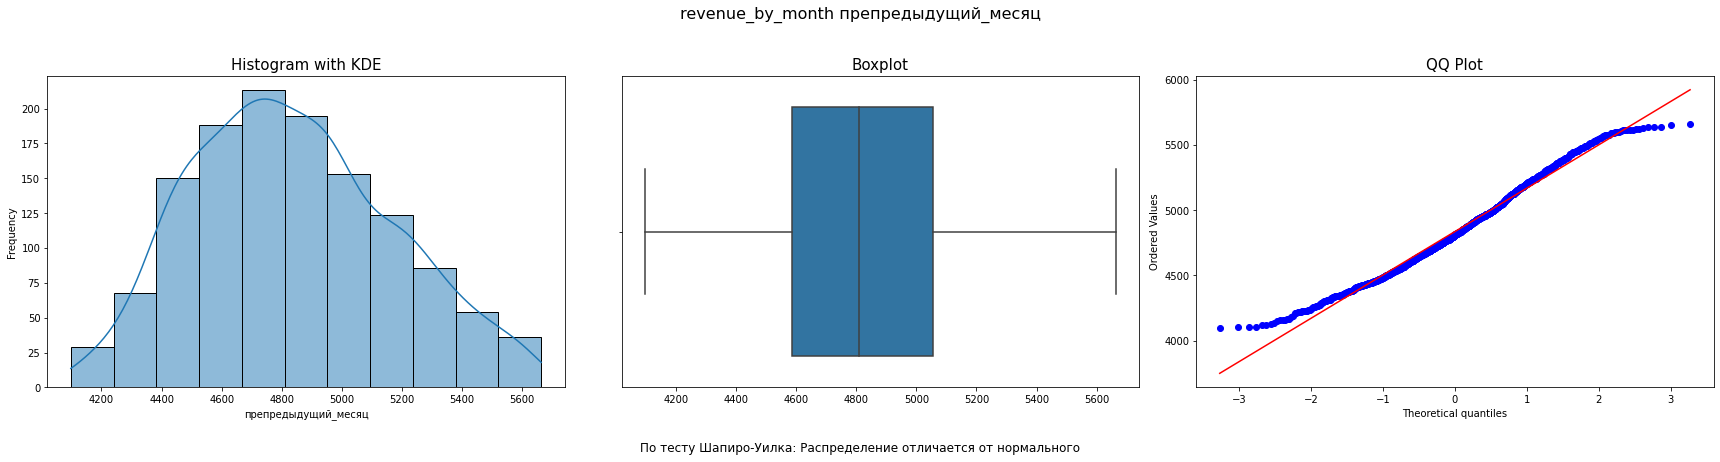

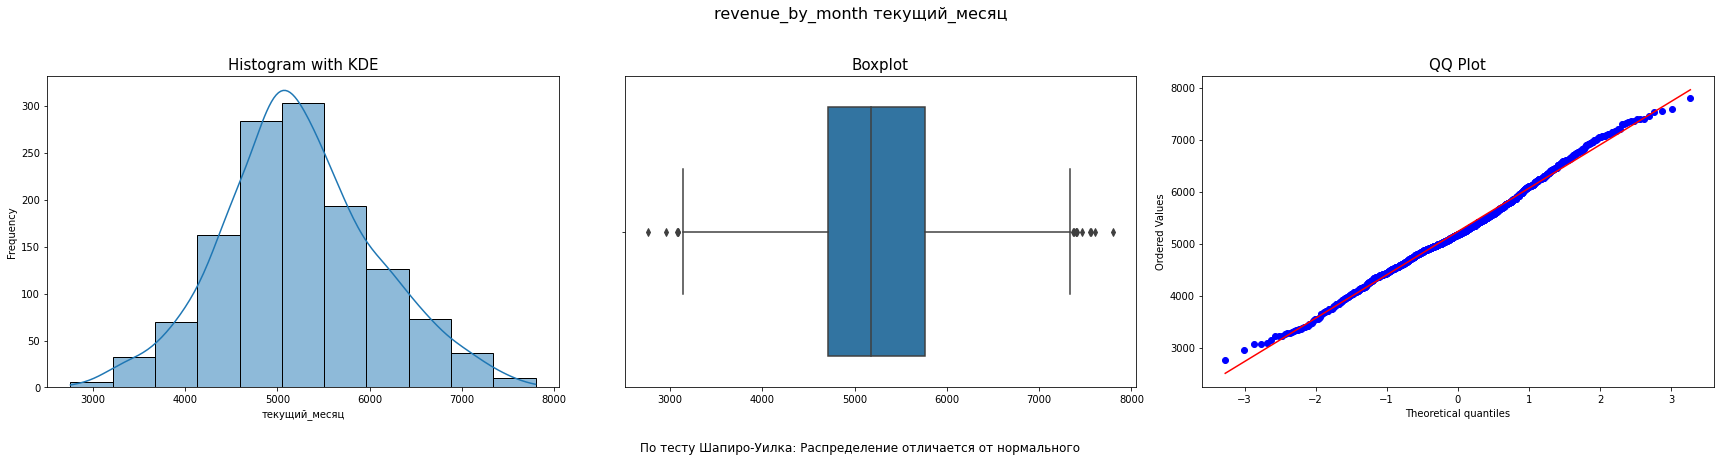

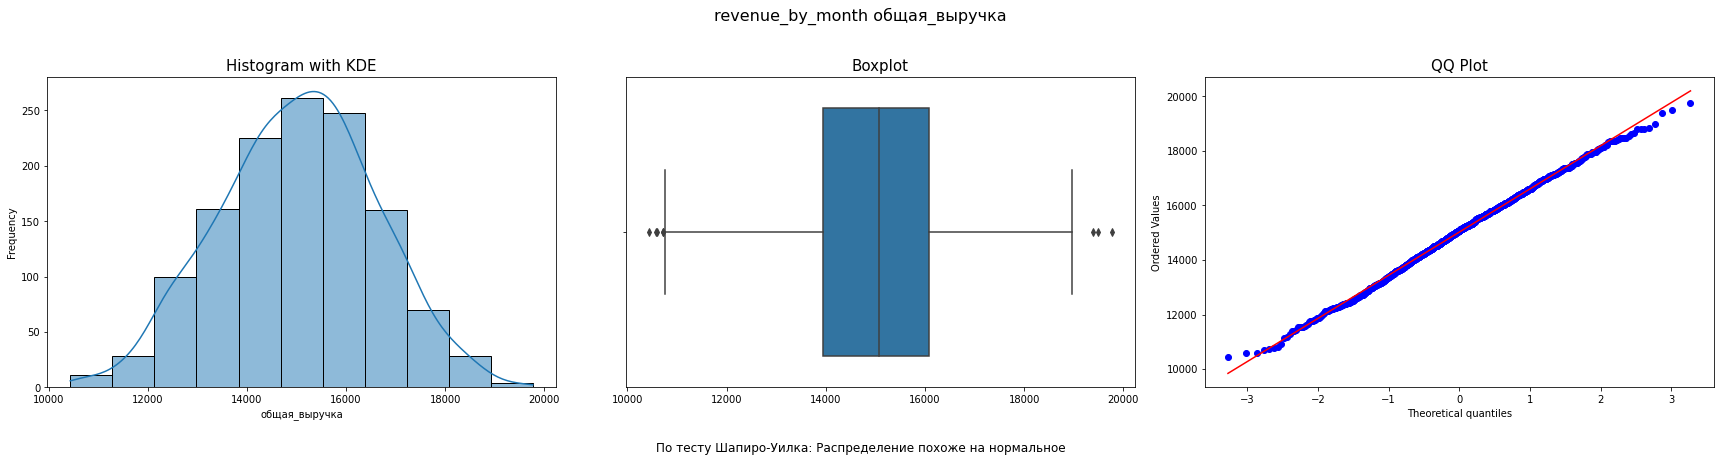

In [42]:
feats = revenue_by_month.select_dtypes(include='number').columns.tolist()
for i in feats:
    plot_combined_analysis(revenue_by_month, i, f'revenue_by_month {i}')

**Вывод:**

1. Выручка в текущем месяце:

- Гистограмма показывает распределение с длинным хвостом вправо, близкое к нормальному.
- Boxplot все еще показывает наличие выбросов, но в меньшем количестве.
- Среднее значение ближе к медиане, но выше.

*Вывод:* Распределение приближено к нормальному, но имеет смещение вправо.

2. Выручка в предыдущем месяце:

- Гистограмма показывает распределение с длинным хвостом вправо.
- Boxplot показывает меньшее количество выбросов.
- Среднее значение ближе к медиане.

*Вывод:* Распределение приближено к нормальному, но все еще смещено вправо.

3. Выручка в препредыдущем месяце:

- Гистограмма показывает более нормальное распределение без выброса.
- Boxplot показывает меньшее количество выбросов.
- Среднее значение ближе к медиане.

*Вывод:* Распределение приближено к нормальному, но с некоторым смещением вправо.

4. Общая выручка:

- Гистограмма показывает распределение с длинным хвостом вправо, но без выброса становится более нормальным.
- Boxplot все еще показывает наличие выбросов, но в меньшем количестве.
- Среднее значение ближе к медиане, но все еще выше.

*Вывод:* Распределение приближено к нормальному, но все еще имеет смещение вправо.

**Итоговые выводы:**
- Без учета выброса, распределения количественных признаков становятся более нормальными.
- Все еще присутствует смещение вправо, что указывает на наличие клиентов с высокой выручкой.
- Средние значения становятся ближе к медианным, указывая на более равномерное распределение данных.

### market_time

#### Статистический анализ количественных данных

In [43]:
market_time.drop(columns = ['id']).describe().T

,count,mean,std,min,25%,50%,75%,max
минут,2600.0,13.336154,4.080198,4.0,10.0,13.0,16.0,23.0


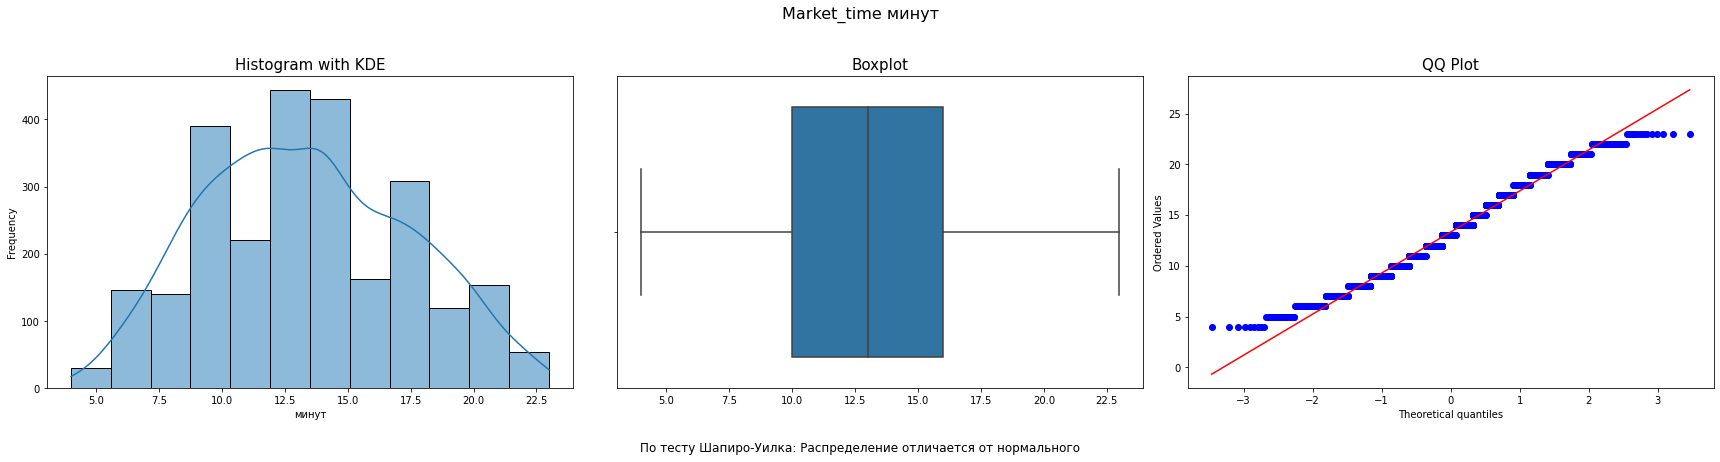

In [44]:
feats = market_time.drop(columns = ['id']).select_dtypes(include='number').columns.tolist()
for i in feats:
    plot_combined_analysis(market_time, i, f'Market_time {i}')

In [45]:
time_by_period = market_time.pivot_table(index='id', columns='период', values='минут')
time_by_period['общее_время'] = time_by_period.sum(axis=1, numeric_only=True)

print("Количество неактивных пользователей, которые не проводили время на сайте за последний период:",
      time_by_period[(time_by_period['общее_время'] == 0)].shape[0])

Количество неактивных пользователей, которые не проводили время на сайте за последний период: 0


In [46]:
time_by_period.describe().T

,count,mean,std,min,25%,50%,75%,max
период,,,,,,,,
предыдущий_месяц,1300.0,13.467692,3.932029,5.0,11.0,13.0,17.0,23.0
текущий_месяц,1300.0,13.204615,4.220589,4.0,10.0,13.0,16.0,23.0
общее_время,1300.0,26.672308,6.698753,9.0,21.0,27.0,32.0,45.0


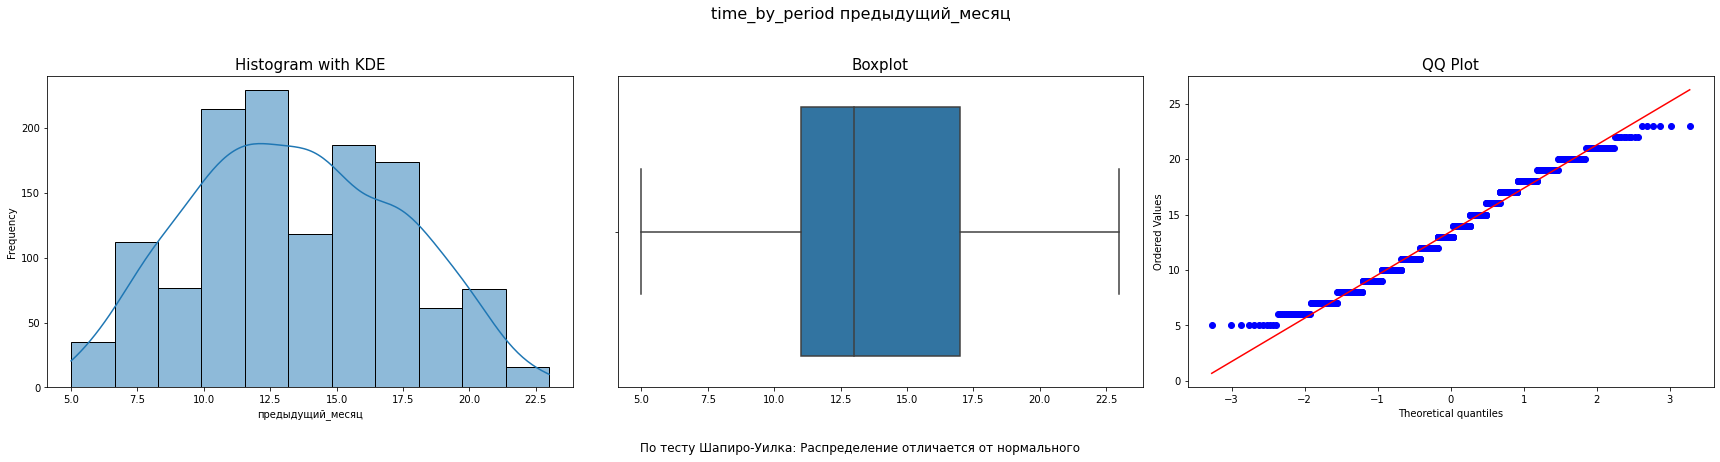

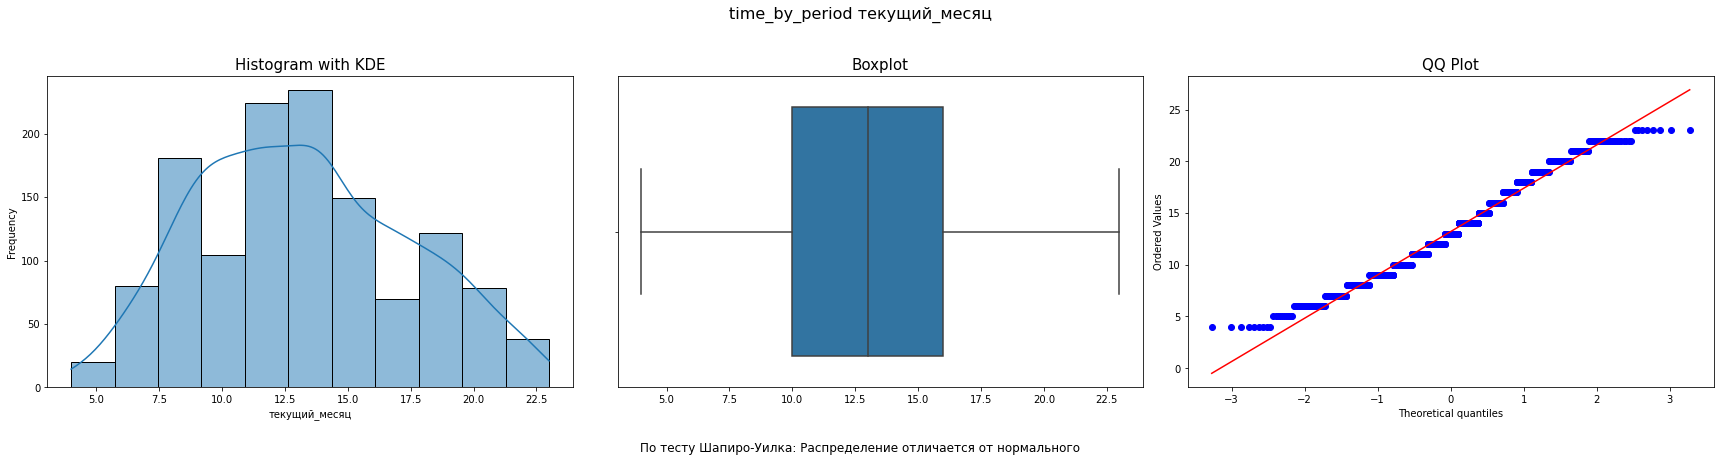

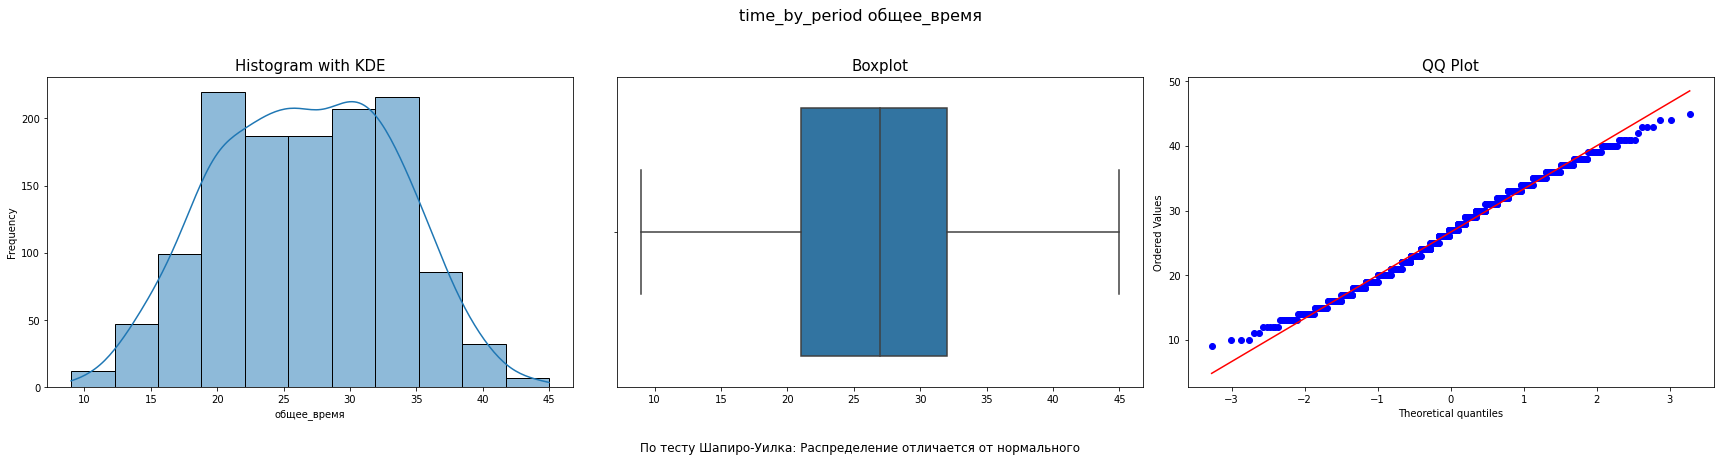

In [47]:
feats = time_by_period.select_dtypes(include='number').columns.tolist()
for i in feats:
    plot_combined_analysis(time_by_period, i, f'time_by_period {i}')

Распределения близки к нормальным.

### money

#### Статистический анализ количественных данных

In [48]:
money.drop(columns = ['id']).describe().T

,count,mean,std,min,25%,50%,75%,max
прибыль,1300.0,3.996631,1.013722,0.86,3.3,4.045,4.67,7.43


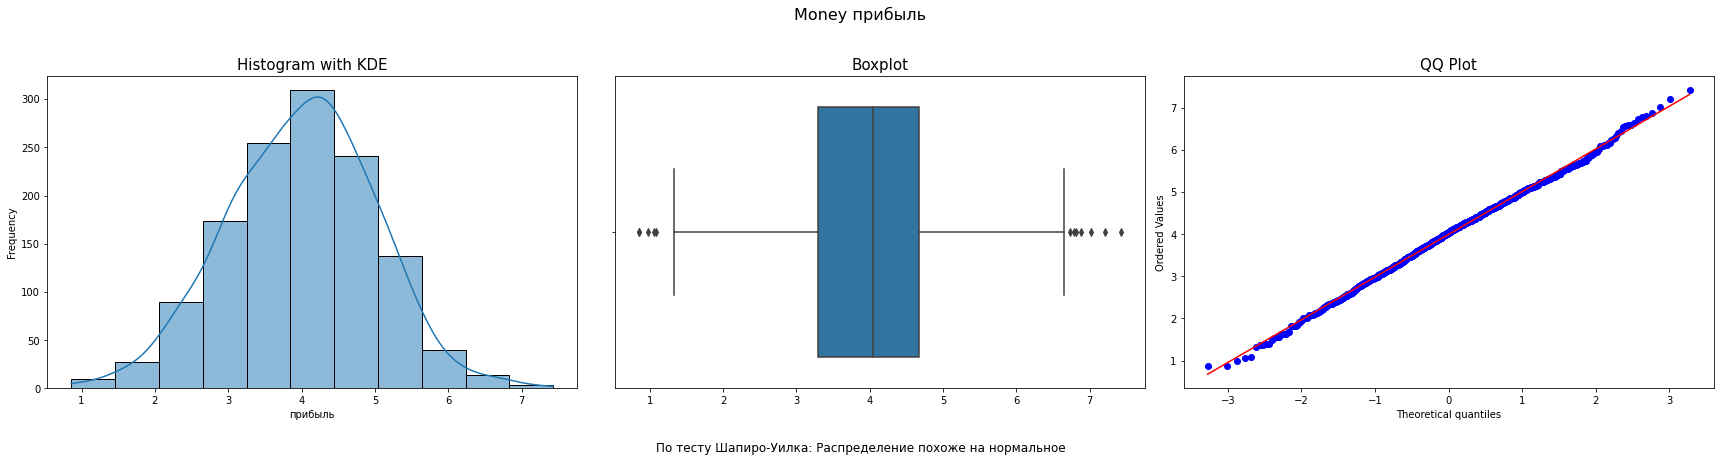

In [49]:
feats = money.drop(columns = ['id']).select_dtypes(include='number').columns.tolist()
for i in feats:
    plot_combined_analysis(money, i, f'Money {i}')

Распределение близко к нормальному.

Уберем id с выбросом и нулевой выручкой из всех датафреймов.

In [50]:
market_file = market_file.query('id not in @delete_id')

time_by_period = time_by_period.query('id not in @delete_id')
money = money.query('id not in @delete_id')


Уберем нулевые значения выручки

### Вывод

- удален выброс с выручкой более 100 тыс
- Категориальные данные: Большинство клиентов находятся на прежнем уровне активности, используют стандартный тип сервиса и согласны получать дополнительные предложения. "Товары для детей" — самая популярная категория.
- Количественные данные:
   - В market_file большинство признаков имеют распределения, близкие к нормальным, за исключением Длительность, Акционные_покупки, Неоплаченные_продукты_штук_квартал и Ошибка_сервиса.
   - В market_money без учета выброса распределения становятся более нормальными, хотя все еще смещены вправо.
   - В market_time распределения близки к нормальным.

Эти выводы помогут в дальнейшей сегментации клиентов и разработке персонализированных предложений для повышения их активности.

## Шаг 4. Объединение таблиц

In [51]:
print("revenue_by_month:", revenue_by_month.isnull().sum())
print("time_by_period:", time_by_period.isnull().sum())


revenue_by_month: период
предыдущий_месяц       0
препредыдущий_месяц    0
текущий_месяц          0
общая_выручка          0
dtype: int64
time_by_period: период
предыдущий_месяц    0
текущий_месяц       0
общее_время         0
dtype: int64


In [52]:
data = market_file.merge(revenue_by_month.drop('общая_выручка',axis=1), on='id', how='inner').merge(time_by_period.drop('общее_время',axis=1), on='id', how='inner')
data = data.rename(columns =  {'предыдущий_месяц_x': 'выручка_предыдущий_месяц',
    'текущий_месяц_x': 'выручка_текущий_месяц',
    'предыдущий_месяц_y': 'время_предыдущий_месяц',
    'текущий_месяц_y': 'время_текущий_месяц'})

data_info(data)


'Первые пять строк данных:'

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


'Последние пять строк данных:'

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц
1291,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1292,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1293,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1294,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7
1295,216647,Прежний уровень,премиум,да,4.0,5,906,0.94,Техника для красоты и здоровья,4,5,3,12,4720.0,5183.0,4448.3,15,10


'Общая информация о датафрейме'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

'Количество пропусков'

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_предыдущий_месяц               0
препредыдущий_месяц                    0
выручка_текущий_месяц                  0
время_предыдущий_месяц                 0
время_текущий_месяц                    0
dtype: int64

'Количество явных дубликатов'

0

Объединение прошло успешно.

## Шаг 5. Корреляционный анализ

Для оценки связей стоит проводить корреляционный анализ по отдельности для каждой категории - по целевому признаку. Так, у нас имеется 2 категории пользователей: чья активность снизилась и чья на прежнем уровне.

Для категория пользователей чья активность **снизилась**

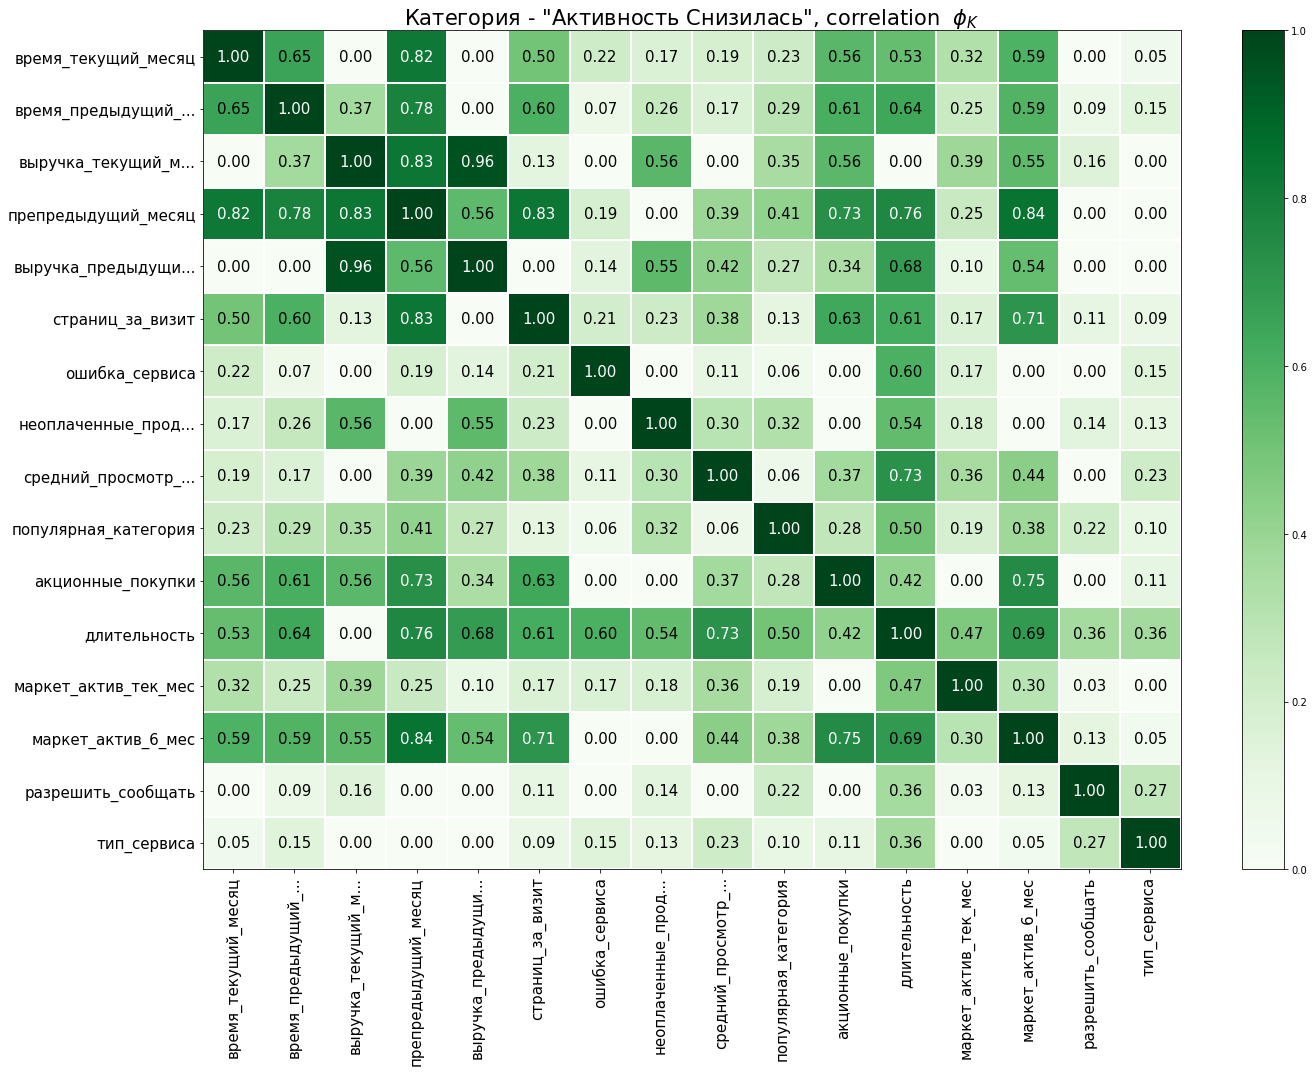

In [53]:
interval_cols  = data.drop('id', axis=1).select_dtypes(include='number').columns.tolist()
phik_overview_1category = phik_matrix(data[data['покупательская_активность']=='Снизилась']
                                      .drop(['id', 'покупательская_активность'],axis=1), interval_cols=interval_cols, bins=100)

plot_correlation_matrix(
    phik_overview_1category.values,
    x_labels=phik_overview_1category.columns,
    y_labels=phik_overview_1category.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Категория - "Активность Снизилась", correlation  $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)


Для категория пользователей чья активность **осталась неизменной**

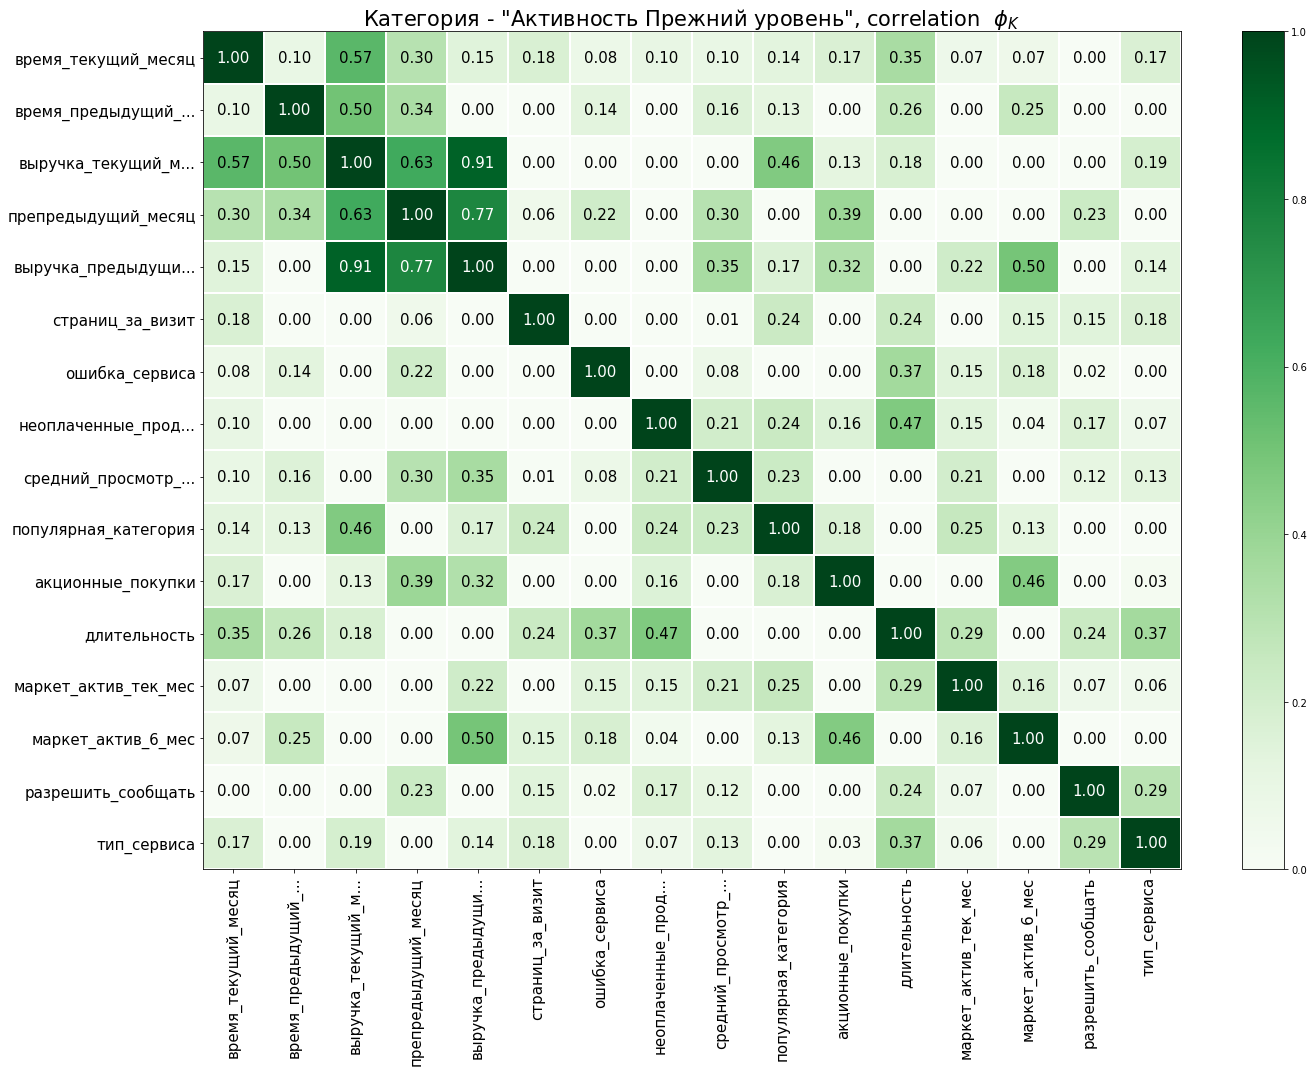

In [54]:
interval_cols  = data.drop('id', axis=1).select_dtypes(include='number').columns.tolist()
phik_overview_2category = phik_matrix(data[data['покупательская_активность']=='Прежний уровень']
                                      .drop(['id', 'покупательская_активность'],axis=1), interval_cols=interval_cols, bins=100)

plot_correlation_matrix(
    phik_overview_2category.values,
    x_labels=phik_overview_2category.columns,
    y_labels=phik_overview_2category.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Категория - "Активность Прежний уровень", correlation  $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)


**Выводы:**
Текущий_месяц_выручка и предыдущий_месяц_выручка имеют высокую корреляцию (выше 0,8). 

Возможные причины:

- Клиенты, как правило, покупают товары с постоянной частотой и в похожих объемах каждый месяц. Если клиент стабильно покупает определенное количество товаров каждый месяц, выручка за текущий и предыдущий месяцы будет похожей.
- Некоторые клиенты могут регулярно покупать одни и те же товары, например, ежемесячно покупать продукты для красоты. Это также приведет к высокой корреляции между выручкой за текущий и предыдущий месяцы.

Следует удалить признак предыдущий_месяц_выручка

In [55]:
data = data.drop('выручка_предыдущий_месяц', axis=1)
data = data.drop('препредыдущий_месяц', axis=1)


Для категория пользователей чья активность **снизилась**

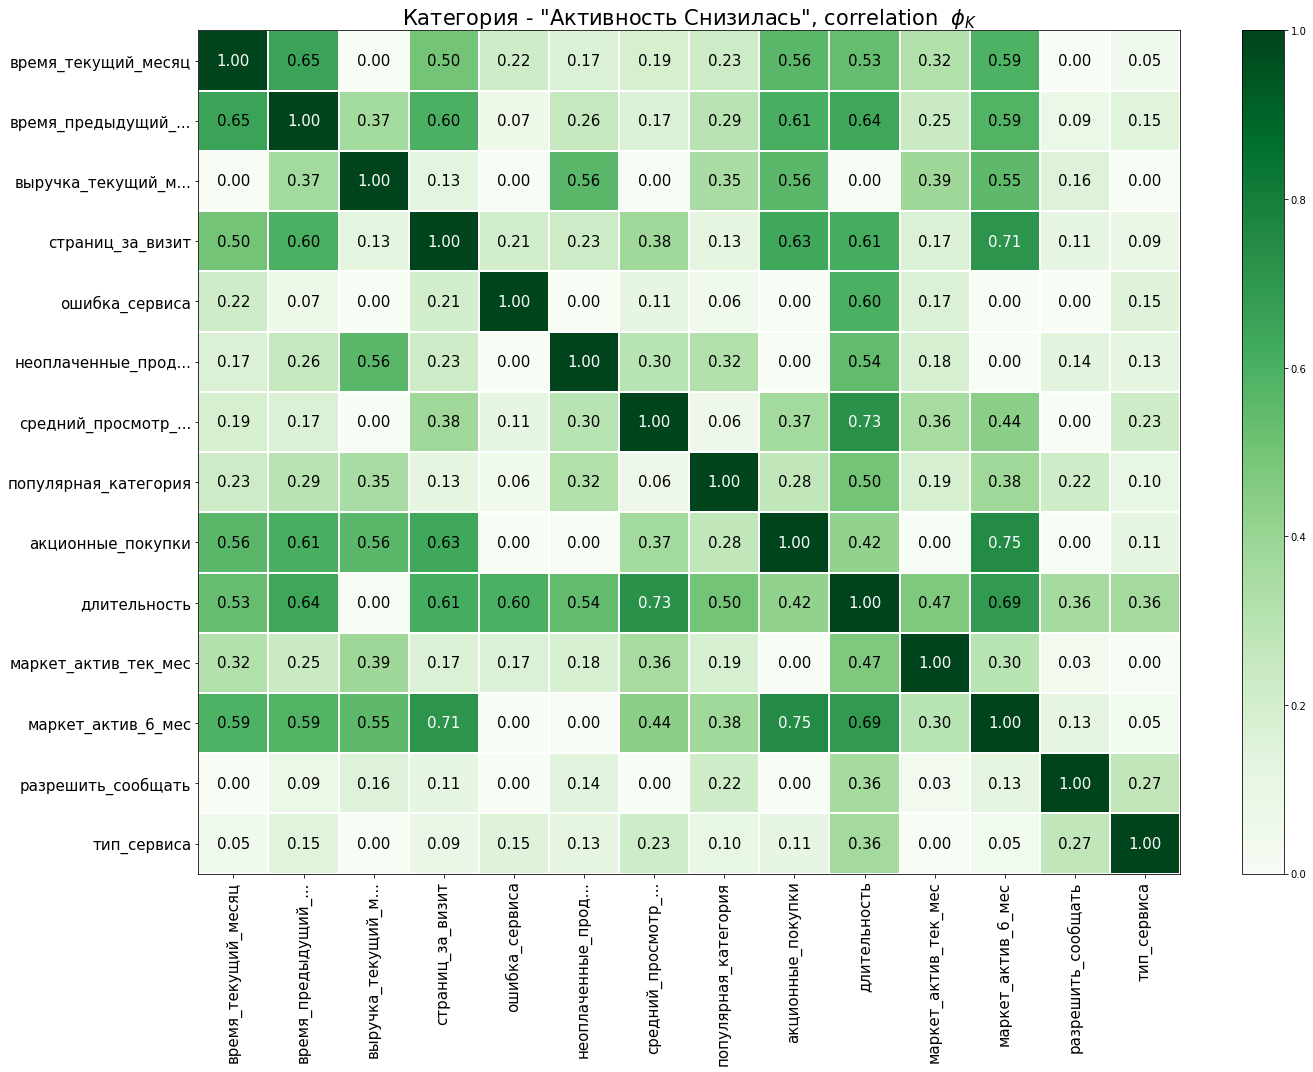

In [56]:
interval_cols  = data.drop('id', axis=1).select_dtypes(include='number').columns.tolist()
phik_overview_1category = phik_matrix(data[data['покупательская_активность']=='Снизилась']
                                      .drop(['id', 'покупательская_активность'],axis=1), interval_cols=interval_cols, bins=100)

plot_correlation_matrix(
    phik_overview_1category.values,
    x_labels=phik_overview_1category.columns,
    y_labels=phik_overview_1category.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Категория - "Активность Снизилась", correlation  $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)


Для категория пользователей чья активность **осталась неизменной**

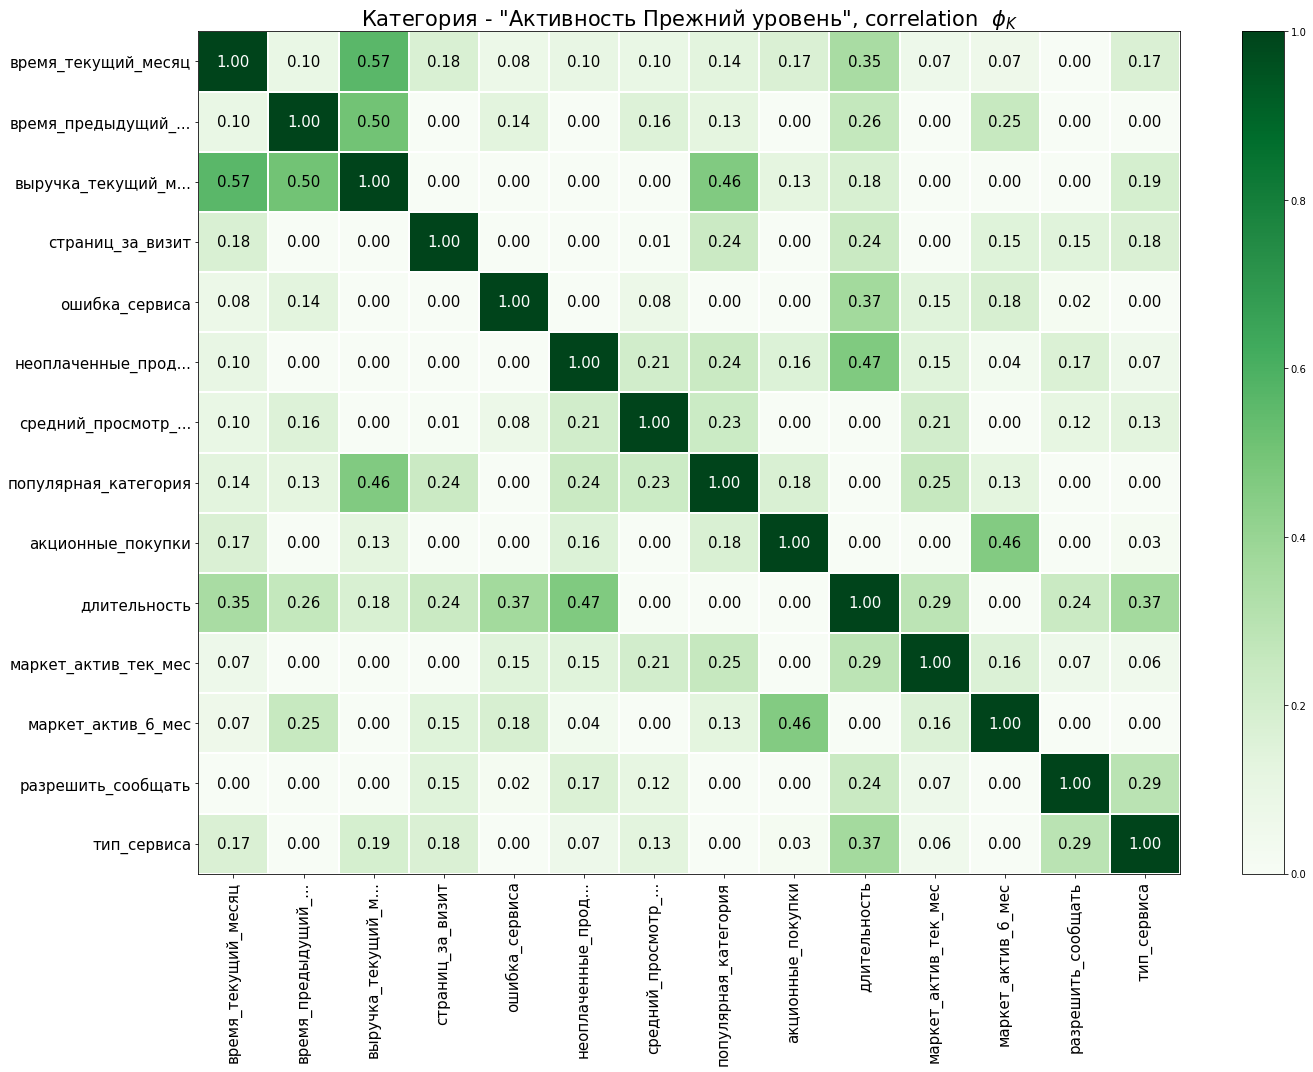

In [57]:
interval_cols  = data.drop('id', axis=1).select_dtypes(include='number').columns.tolist()
phik_overview_2category = phik_matrix(data[data['покупательская_активность']=='Прежний уровень']
                                      .drop(['id', 'покупательская_активность'],axis=1), interval_cols=interval_cols, bins=100)

plot_correlation_matrix(
    phik_overview_2category.values,
    x_labels=phik_overview_2category.columns,
    y_labels=phik_overview_2category.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Категория - "Активность Прежний уровень", correlation  $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
)


Значений корреляции выше 0,8 нет - остальные признаки отсавляем

In [58]:
data['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [59]:
list(data.columns.values )

['id',
 'покупательская_активность',
 'тип_сервиса',
 'разрешить_сообщать',
 'маркет_актив_6_мес',
 'маркет_актив_тек_мес',
 'длительность',
 'акционные_покупки',
 'популярная_категория',
 'средний_просмотр_категорий_за_визит',
 'неоплаченные_продукты_штук_квартал',
 'ошибка_сервиса',
 'страниц_за_визит',
 'выручка_текущий_месяц',
 'время_предыдущий_месяц',
 'время_текущий_месяц']

In [60]:
data.select_dtypes(include='number').drop(['id'], axis=1).columns.tolist()

['маркет_актив_6_мес',
 'маркет_актив_тек_мес',
 'длительность',
 'акционные_покупки',
 'средний_просмотр_категорий_за_визит',
 'неоплаченные_продукты_штук_квартал',
 'ошибка_сервиса',
 'страниц_за_визит',
 'выручка_текущий_месяц',
 'время_предыдущий_месяц',
 'время_текущий_месяц']

## Шаг 6. Использование пайплайнов

In [ ]:
temp = pd.DataFrame({
    'labels': data['покупательская_активность'].value_counts().index,
    'values': data['покупательская_активность'].value_counts()
})
ax = sns.barplot(data=temp, x='labels', y='values')

plt.title('Соотношение целевого признака', fontsize=15)
plt.xlabel('Покупательская активность')
plt.ylabel('Количество пользователей')
plt.show()

- присутствует дисбаланс целевого признака;
- будем использовать стратифицированные по целевому признаку выборки.

In [62]:

label_encoder = LabelEncoder()
X=data.drop(['id', 'покупательская_активность'], axis=1)
y=label_encoder.fit_transform(data['покупательская_активность'])

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y # элемент стратификации
)

In [63]:

X_train.shape, X_test.shape

# создаём списки с названиями признаков
ohe_columns = data.select_dtypes(exclude='number').drop([ 'покупательская_активность', 'тип_сервиса'], axis=1).columns.tolist()
ord_columns = ['тип_сервиса']
num_columns = data.select_dtypes(include='number').drop(['id'], axis=1).columns.tolist()

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ] 
    )
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)



In [64]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [65]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,5),
        'models__max_features': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors':range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C':range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    { 'models': [SVC(random_state=RANDOM_STATE)],
        'models__C': [0.01, 0.1, 1, 10, 100],
        'models__kernel': ['linear'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']
    }
]

In [66]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)


print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = randomized_search.predict(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, randomized_search.best_estimator_.predict_proba(X_test)[:, 1])}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                 

Так как в данных присутсвует дисбаланс целевого признака корректней использовать метрику ROC-AUC. Ее можно использовать, когда необходимо оценить качество работы модели вне зависимости от выбранного порога вероятности. (Метрику можно использовать в случае, когда объектов с одним значением целевого признака больше, чем с другими)

## Шаг 7.  Анализ важности признаков

### shap.plots.beeswarm

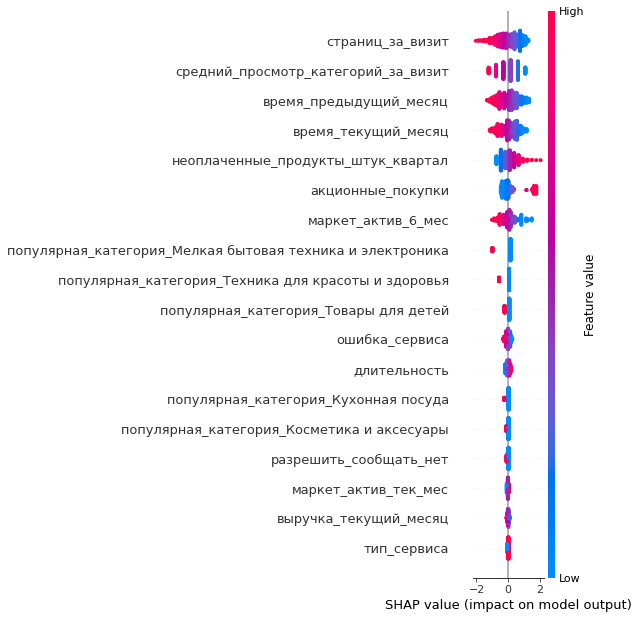

In [71]:
best_model = randomized_search.best_estimator_

# Трансформируем тестовый набор данных с помощью пайплайна
X_train_transformed = best_model['preprocessor'].fit_transform(X_train)
X_test_transformed = best_model['preprocessor'].transform(X_test)

# Создаем объект Explainer для модели
explainer = shap.LinearExplainer(best_model['models'], X_train_transformed, feature_perturbation="interventional")

# Получаем SHAP значения для тестового набора данных
shap_values = explainer.shap_values(X_test_transformed)

# Получение имен признаков после трансформации
ohe_feature_names = best_model['preprocessor'].transformers_[0][1]['ohe'].get_feature_names_out(ohe_columns)
all_feature_names = np.concatenate([ohe_feature_names, ord_columns, num_columns])

# Построение SHAP beeswarm plot
shap.summary_plot(shap_values, X_test_transformed, feature_names=all_feature_names)


### shap.plots.beeswarm

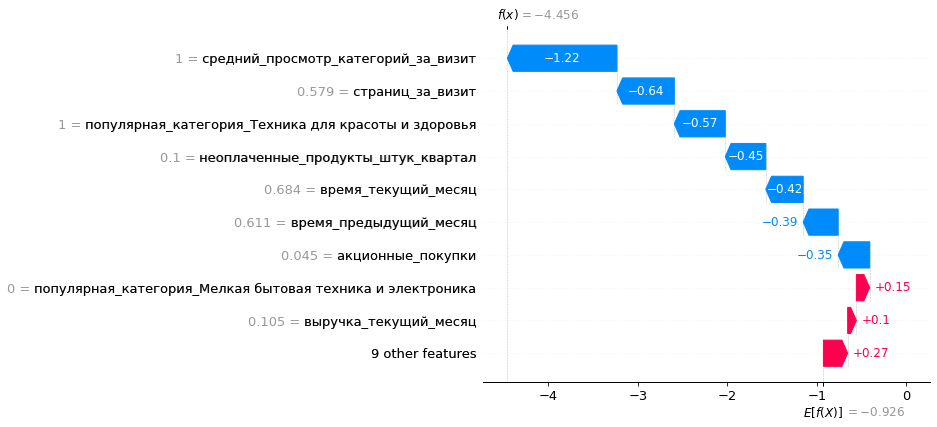

In [72]:
best_model = randomized_search.best_estimator_

X_test_transformed = best_model['preprocessor'].transform(X_test)

explainer = shap.LinearExplainer(best_model['models'], X_train_transformed, feature_perturbation="interventional")

shap_values = explainer.shap_values(X_test_transformed)

index = 0  
shap_value = shap_values[index]

ohe_feature_names = best_model['preprocessor'].transformers_[0][1]['ohe'].get_feature_names_out(ohe_columns)
all_feature_names = np.concatenate([ohe_feature_names,ord_columns, num_columns])

shap_explanation = shap.Explanation(values=shap_value, base_values=explainer.expected_value, data=X_test_transformed[index], feature_names=all_feature_names)

shap.waterfall_plot(shap_explanation)


###  shap.plots.bar

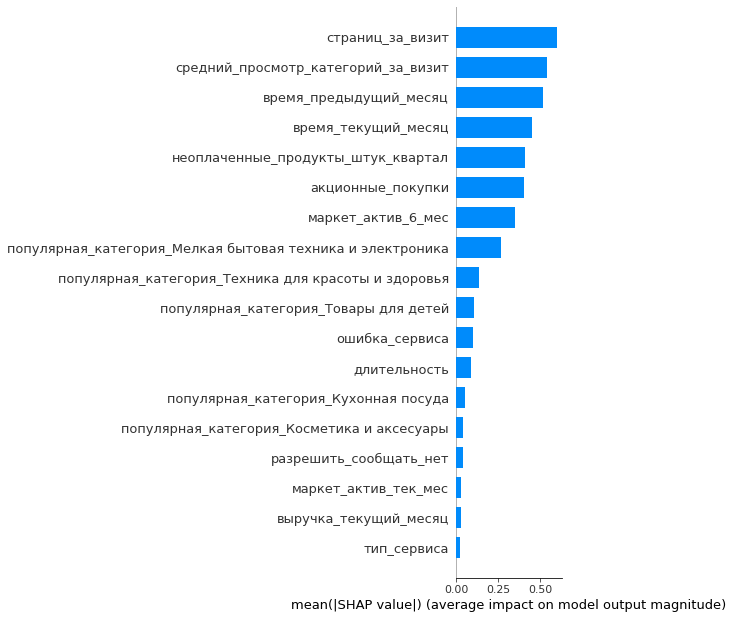

In [73]:
best_model = randomized_search.best_estimator_

X_test_transformed = best_model['preprocessor'].transform(X_test)

explainer = shap.LinearExplainer(best_model['models'], X_train_transformed, feature_perturbation="interventional")

shap_values = explainer.shap_values(X_test_transformed)

ohe_feature_names = best_model['preprocessor'].transformers_[0][1]['ohe'].get_feature_names_out(ohe_columns)
all_feature_names = np.concatenate([ohe_feature_names, ord_columns, num_columns])

shap.summary_plot(shap_values, X_test_transformed, feature_names=all_feature_names, plot_type='bar')

Основываясь на диаграмме SHAP beeswarm, можно сделать следующие выводы:

 1.  Наиболее значимые признаки:
 - страниц_за_визит, 
 - средний_просмотр_категорий_за_визит, 
 - время_предыдущий_месяц , 
 - время_текущий_месяц,
 - неоплаченные_продукты_штук_квартал,
 - акционные_покупки
 
 Эти признаки имеют высокие значения SHAP, что указывает на значительное влияние на выходные данные модели.
 
 2. Цветовая шкала указывает, являются ли значения признака высокими (красный цвет) или низкими (синий цвет). Например, высокие значения признака num_акционные_покупки имеют тенденцию сдвигать предсказание в одном направлении, в то время как низкие значения — в противоположном.
 
 3. Признаки, такие как num_страницы_за_визит и num_акционные_покупки, показывают четкие кластеры высоких и низких значений, что может свидетельствовать о постоянном влиянии этих признаков на предсказания.
 
 4. Категориальные признаки, закодированные методом one-hot (например, ohe_популярная_категория_Мелкая бытовая техника и электроника), также имеют значительное влияние, что указывает на важность этих категорий в предсказаниях.



На основе бар-чарта, можно сделать следующие выводы о важности признаков на основе значений SHAP:
 1. Наиболее значимые признаки:
  
  num_страницы_за_визит, num_акционные_покупки num_время_предыдущий_месяц и num_время_Текущий_месяц имеют наибольшее среднее значение абсолютных SHAP значений. Это указывает на их значительное влияние на предсказания модели.
  
 2.  Значение признаков:
  
  Средний просмотр категорий за визит (средний_просмотр_категорий_за_визит), и количество страниц за визит (num_страницы_за_визит) являются ключевыми факторами, влияющими на модель. Эти признаки дают наиболее существенный вклад в предсказания.

 3.  Влияние категориальных признаков:
 
 Некоторые категориальные признаки, такие как ohe_популярная_категория_Мелкая бытовая техника и электроника и ohe_популярная_категория_Техника для красоты и здоровья, также оказывают значительное влияние на предсказания модели.
 
 4. Низко значимые признаки:
 
 Признаки, такие как ohe_популярная_категория_Товары для детей и ohe_ошибка_сервиса, имеют наименьшие значения SHAP, что указывает на их менее значительное влияние на модель по сравнению с другими признаками.



## Шаг 8. Сегментация покупателей

In [74]:

threshold = 0.9

# 8.1 Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.
# Применим модель для всех данных

predictions = randomized_search.best_estimator_.predict_proba(X)[:, 1]
prediction_flags = np.where(predictions > threshold, True, False)

Выберем только те данные для которых модель предсказала снижение и добавим к ним данные по выручке

In [75]:
df_full=data.merge(money, on='id', how='inner')
df_decline = df_full.loc[prediction_flags].reset_index()


In [ ]:
df_decline.info()

Проанлизируем весомые признаки по shap:

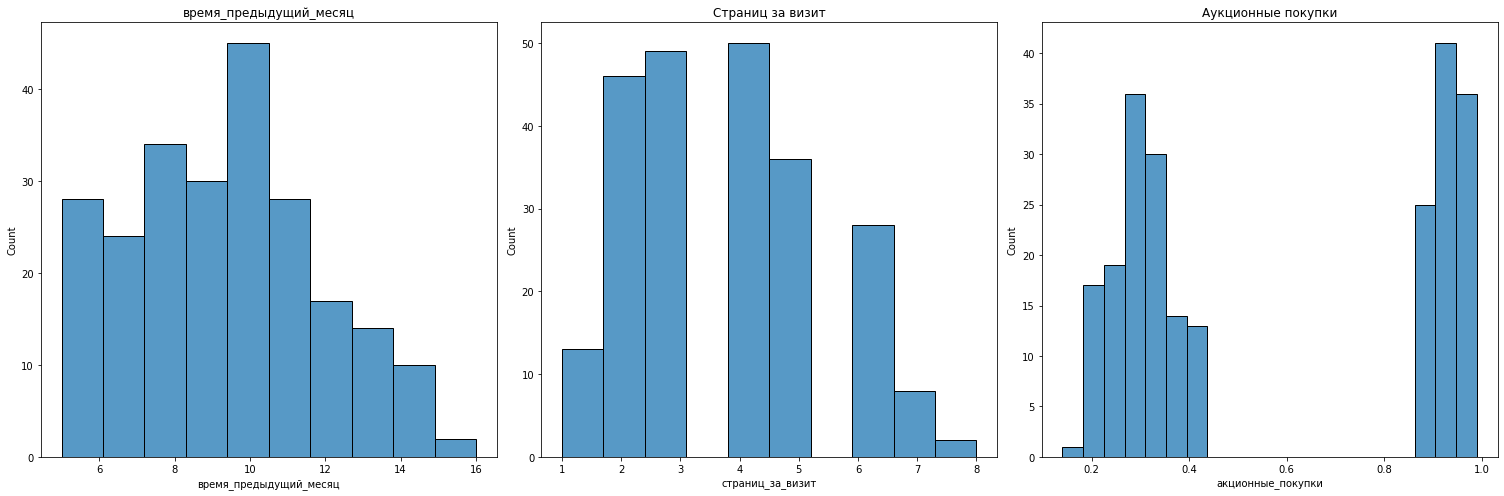

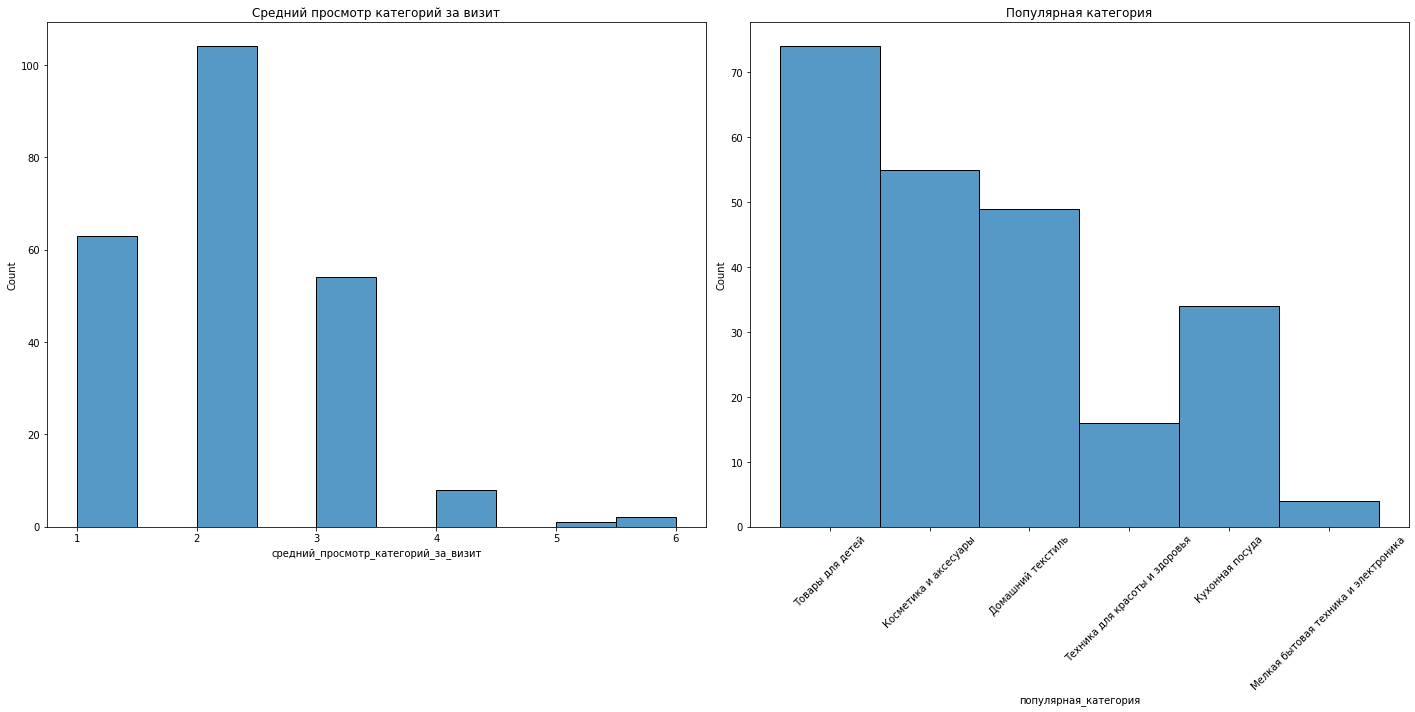

In [77]:
plt.figure(figsize=(21, 7))

plt.subplot(1, 3, 1)
sns.histplot(df_decline['время_предыдущий_месяц'], bins=10)
plt.title('время_предыдущий_месяц')

plt.subplot(1, 3, 2)
sns.histplot(df_decline['страниц_за_визит'], bins=10)
plt.title('Страниц за визит')

plt.subplot(1, 3, 3)
sns.histplot(df_decline['акционные_покупки'], bins=20)
plt.title('Аукционные покупки')

plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.histplot(df_decline['средний_просмотр_категорий_за_визит'], bins=10)
plt.title('Средний просмотр категорий за визит')

plt.subplot(1, 2, 2)
sns.histplot(df_decline['популярная_категория'], bins=10)
plt.title('Популярная категория')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

Снижение активности хартеризует: 
- время препровждение мньше 10 мин
- просмотр меньше 6 стр
- высокая доля или низкая акционным покупкам
- средний просмотр меньшу 2-х категорий за визит
- целевая аудитория товаров для детей

В интресах бизнеса обратить внимание на тех покупателей, которые модель предсказывает как со сниженной покупательской активностью, но при этом приносящих высокую прибыль. Нужно описать портрет именно таких покупателей.


In [78]:
df_full['прибыль'].describe()

count    1296.000000
mean        3.997701
std         1.011198
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

In [ ]:
df_decline.head()

In [80]:
df_decline=df_decline.query('прибыль >= 4.6').reset_index()

In [ ]:
df_decline.head()

In [82]:
columns_to_delete=['level_0', 'index']
df_decline = df_decline.drop(columns = columns_to_delete)

In [ ]:
df_decline.head()

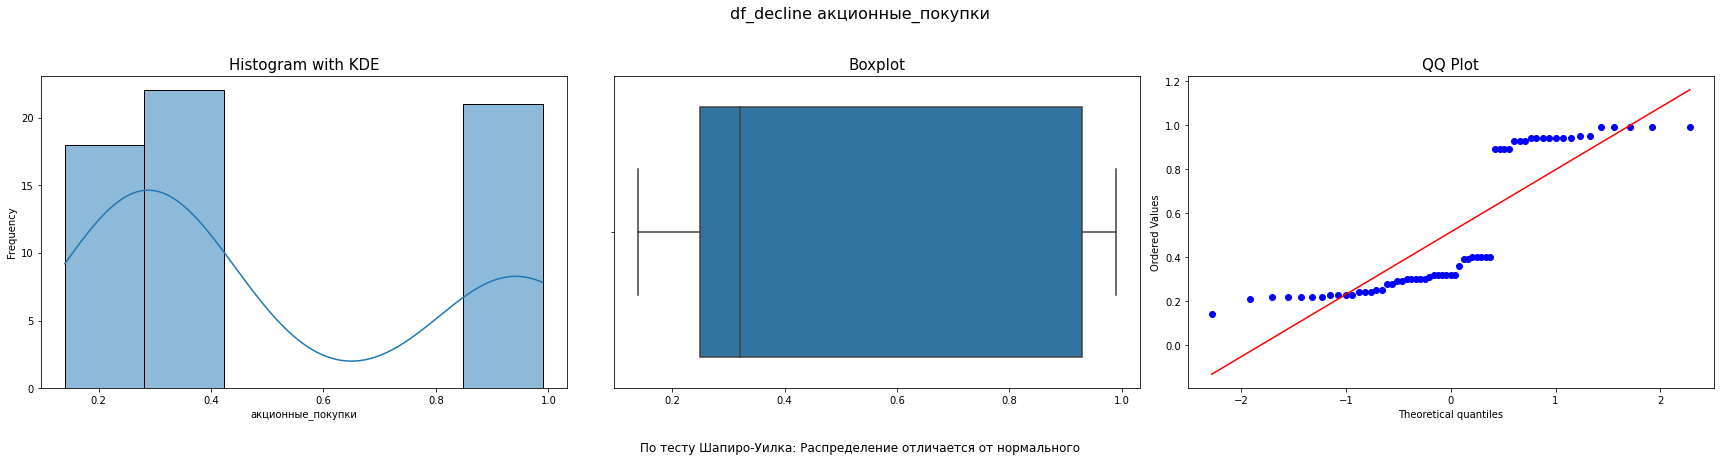

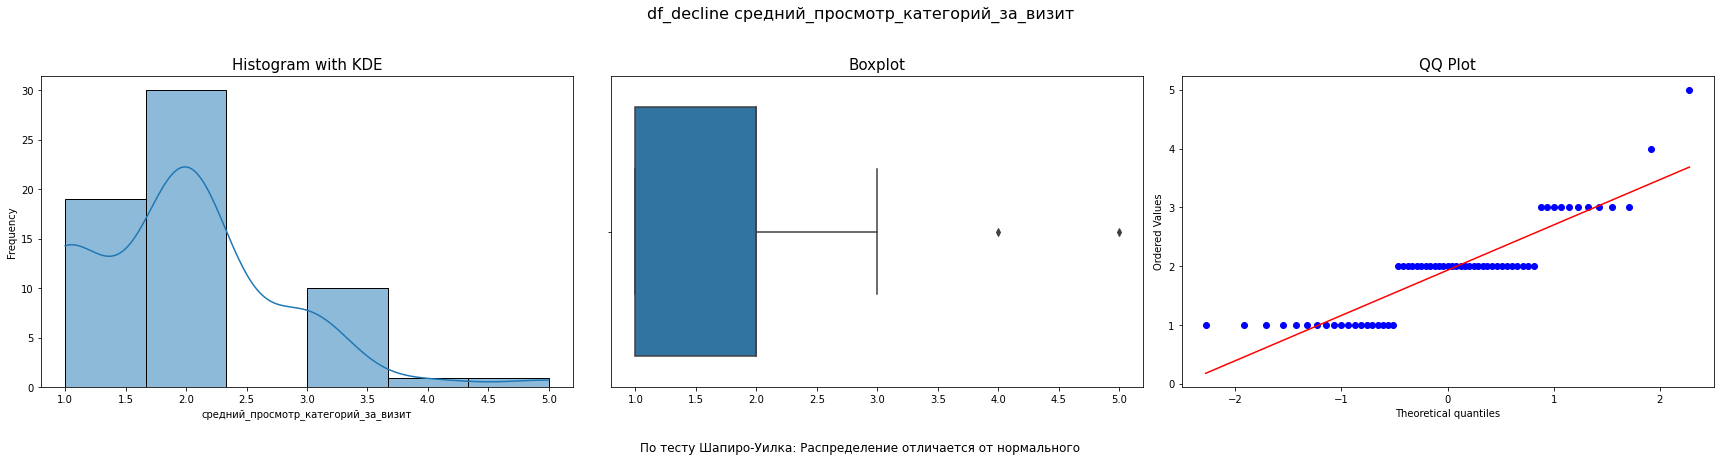

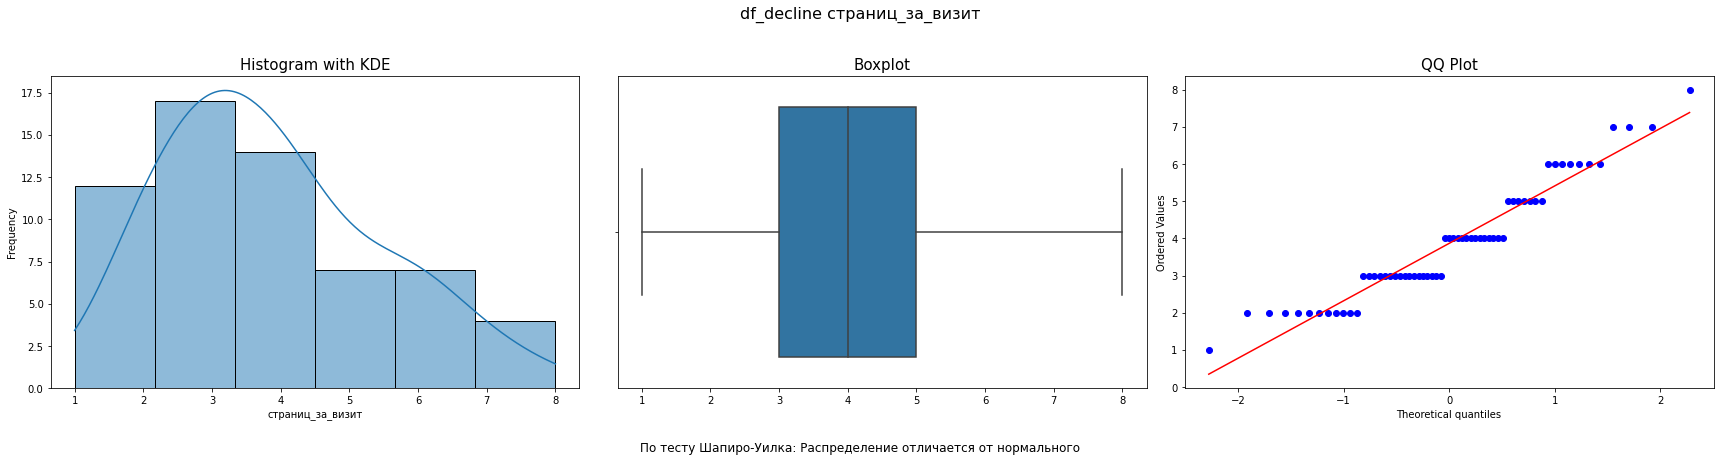

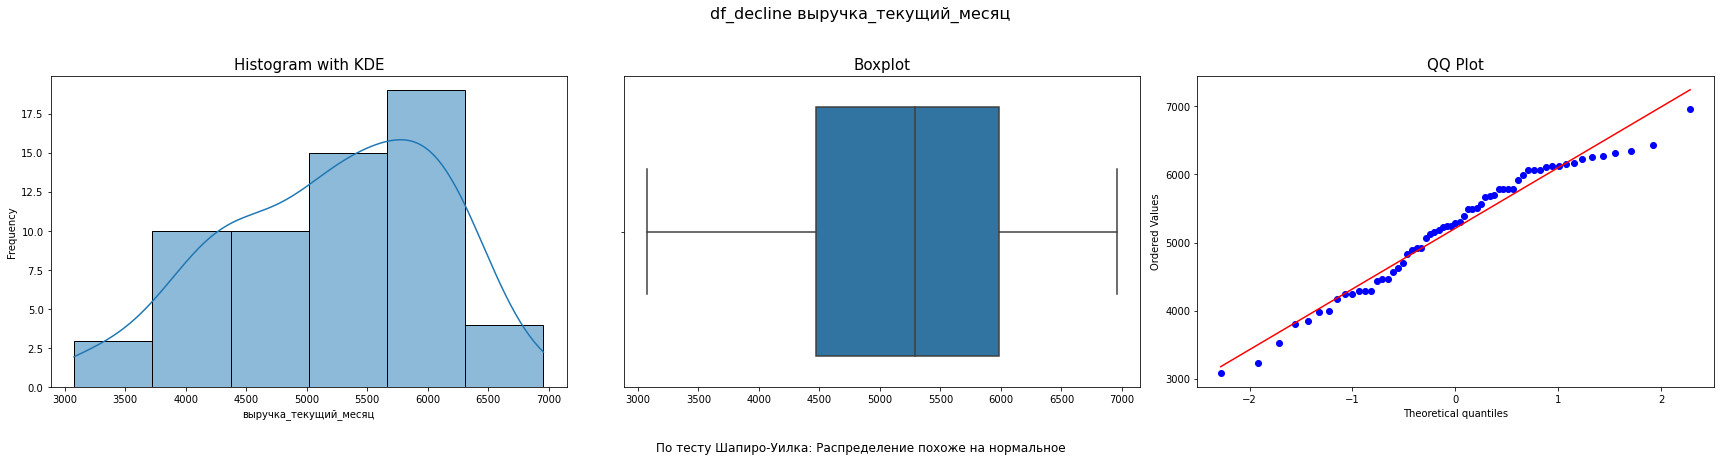

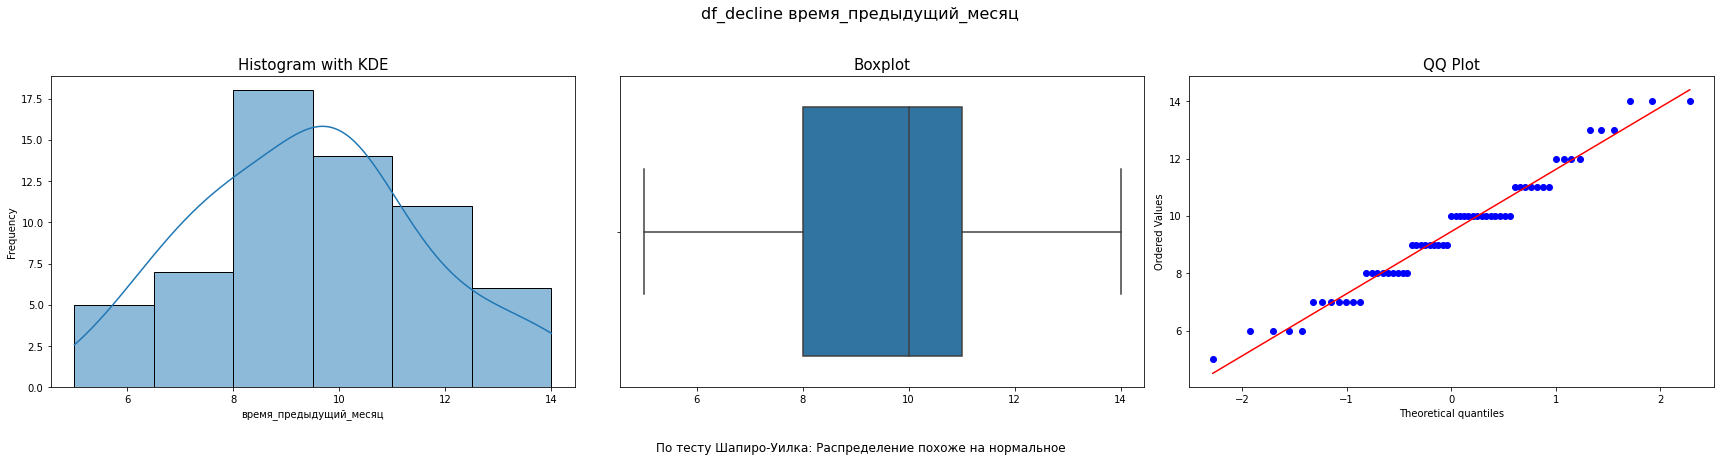

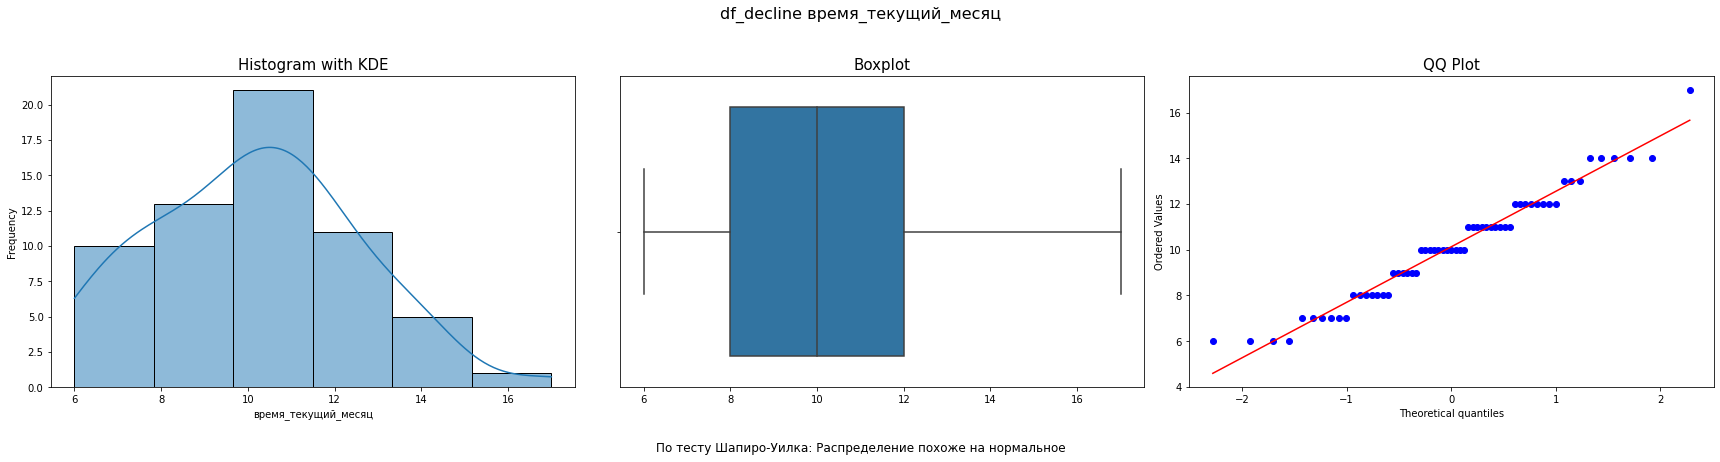

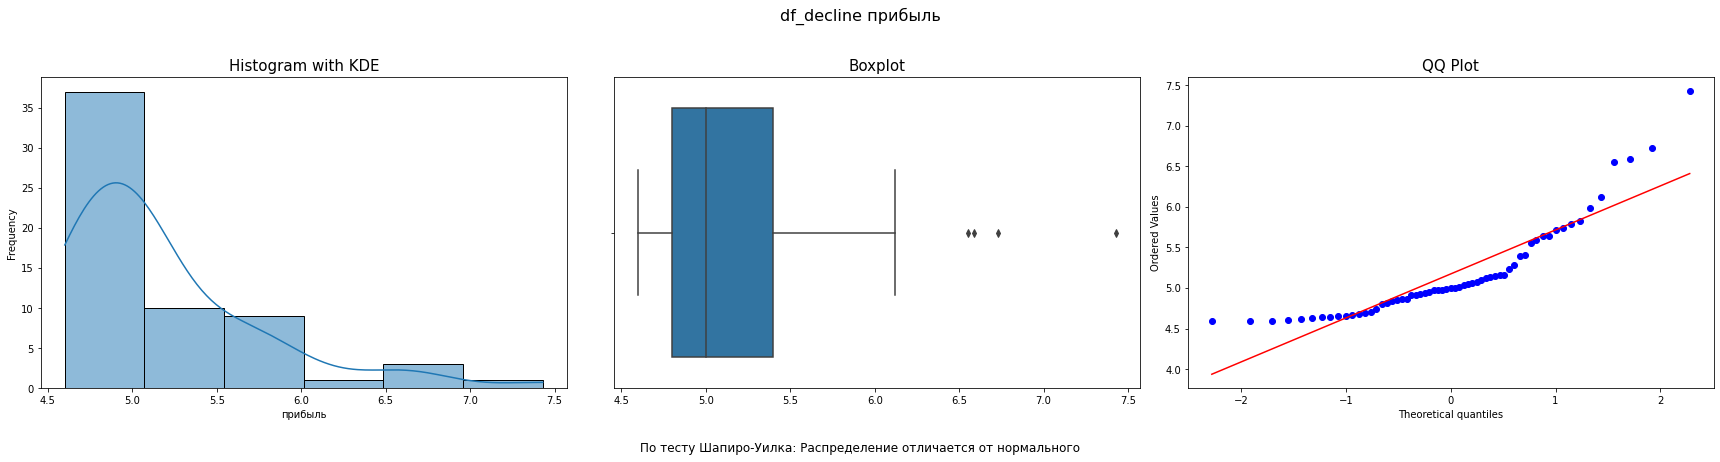

In [84]:
columns = ['id', 'маркет_актив_6_мес', 'разрешить_сообщать', 'ошибка_сервиса',
           'неоплаченные_продукты_штук_квартал', 'маркет_актив_тек_мес', 'длительность']
feats = df_decline.drop(columns = columns).select_dtypes(include='number').columns.tolist()
for i in feats:
    plot_combined_analysis(df_decline, i, f'df_decline {i}')

In [85]:
df_decline.pivot_table(index=['популярная_категория'], values='id', aggfunc='count')

,id
популярная_категория,
Домашний текстиль,11
Косметика и аксесуары,20
Кухонная посуда,8
Техника для красоты и здоровья,7
Товары для детей,15


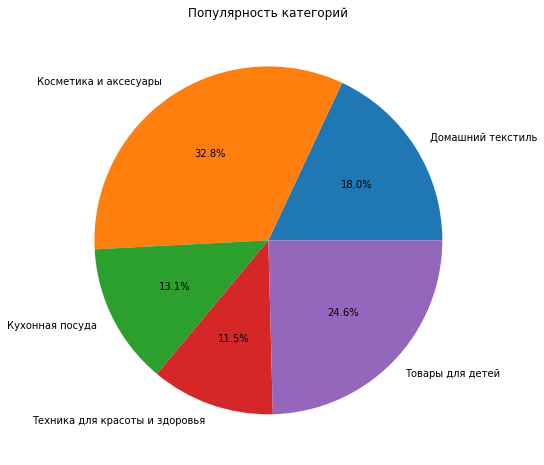

In [86]:
df_decline.pivot_table(index=['популярная_категория'], values='id', aggfunc='count').plot.pie(y='id',
                                                                    autopct='%1.1f%%', figsize=(8, 8), legend=False)
plt.title('Популярность категорий')
plt.ylabel('')  
plt.show()

Портрет клиента чья активность имеет тенденцию к снижению:

 - средний просмотр за визит менее 4 станиц за визит и менее 3 категорий
 - клиент использует сервис исключительно для покупки акционных товаров либо не выказывает интрес к акционным товарам (возможная причина не информированность: предложка акционных товаров нерелевантна)
 - среднее время проведение на сайте менее 10 мин
 - популярные категории: косметика и аксесуары, товары для детей
 

Рекомендации:
- проработать с отделом маркетинга предложку рекомендаций для клиетов, чтобы познакомить их с другим асортиментом товаром помимо популярных.
- улучшить рекомендации: чтобы на первых страницах сайта были интресуещее клиентов товары - чем дольше человек листает страницы и не находит интернсующий товар. тем ниже у него интрес к сервису.

Исследование говорит о том, что нужно опимизировать индивидуальную выдачу под каждого клиента. Что бы у клиентов поддерживался и не пропадал интерес и пользовательская активность.

## Шаг 9. Итоговый вывод

Интернет-магазин «В один клик» поставил задачу создать модель для предсказанния снижения покупательской активности на основании предоставленных данных и разработать предложение по удержанию покупательской активности.

- Мы загрузили данные и проверили их на дубликаты, опечатки, пропуски.
- В данных были только опечатки. Исправили их.
- Провели исследовательский анализ данных. Выяснили, что клиенты с сохранившейся покупательской активностью не имеют низкой маркетинговой активности, не имеют низких показателей по признакам "Страниц_за_визит" и "средний_просмотр_категорий_за визит", "страниц_за_визит".
- Объеденили таблицы для обучения модели.
- Произвели корреляционный анализ. 
- Для создания лучше модели с лучшими параметрами, построили и протестировали 4 модели с разными гиперпараметрами и выбрали одну с лучшими показателями на оценке ROC-AUC.  Она оценивает качество решений модели , учитывая все возможные пороговые значения. Поэтому она не зависит от порога. 
- После тестов лучше моделью оказалась модель с методом опорных векторов, у которой полиномиальное ядро 9 степени.
- Результаты на тестовых данных показали метрику 0.86.
- Анализ важности признаков показал лидеров и отстающих. Признаки "взаимодействия с клиентом" такие как  "Страниц_за_визит", "средний_просмотр_категорий_за визит", "страниц_за_визит" и "акционные_покупки" являются основными и ориентируясь на них модель дает предсказания.
- Сегментация покупателей:
    - Клиентов можно сегментировать по предсказанию модели о покупательской активности
    - Повышать активность нужно улучшением индивидуальной выдачи, учитывающей индивидуальные предпочтения покупателя.